In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
import os

workflows = ['rnaseqDrosophila', 'rnaseq', 'sarek', 'mag', 'rangeland']
workflowsEval = ['rnaseq', 'sarek', 'mag', 'rangeland']

workflowNames = {
    "rnaseq" : "RNA-Seq",
    "rnaseqDrosophila" : "RNA-Seq (D.)",
    "sarek" : "Sarek",
    "chipseq" : "Chip-Seq",
    "mag" : "MAG",
    "rangeland" : "Rangeland",
}

strategyNames = {
    'orig-ceph' : "Original User", 
    'cws-ceph': "Rank User",
    'cwslr-ceph': "Rank Witt-LR",
    'cwsponderweighted-ceph' : "Rank Ponder",
    'cwsponderweighted2-ceph' : "Rank Ponder2",
    'lfflr-ceph' : "LFF(Min) Witt-LR",
    'lffponderweighted-ceph' : "LFF(Min) Ponder",
    'lffponderweighted2-ceph' : "LFF(Max) Ponder2",
    'gslr-ceph' : "GS(Min) Witt-LR", 
    'gsponderweighted-ceph': "GS(Min) Ponder",
    'gsmlr-ceph' : "GS(Max) Witt-LR",
    'gsmponderweighted-ceph': "GS(Max) Ponder",
    'lffmaxlr-ceph' : "LFF(Max) Witt-LR",
    'lffmaxponderweighted-ceph' : "LFF(Max) Ponder",
}

palette = sns.color_palette("tab20", len(strategyNames))

strategyColorsTmp = {
    'orig-ceph' : palette[0], 
    'cws-ceph': palette[1],
    'cwsponderweighted-ceph' : palette[2],
    'cwslr-ceph': palette[3],
    'cwsponderweighted2-ceph' : "yellow",
    'lffponderweighted-ceph' : palette[4],
    'lfflr-ceph' : palette[5],
    'lffponderweighted2-ceph' : "yellow",
    'gsponderweighted-ceph': palette[6],
    'gslr-ceph' : palette[7], 
    'gsmponderweighted-ceph': palette[8],
    'gsmlr-ceph' : palette[9],
    'lffmaxponderweighted-ceph' : palette[10],
    'lffmaxlr-ceph' : palette[11],
}

strategyColors = {strategyNames[key]: strategyColorsTmp[key] for key in strategyColorsTmp.keys()}

strategyGroups = {key: "Witt-LR" if "Witt-LR" in strategyNames[key] else "Ponder" if "Ponder" in strategyNames[key] else "User" for i, key in enumerate(strategyNames.keys())}
strategyGroupsByValues = {key: "Witt-LR" if "Witt-LR" in key else "Ponder" if "Ponder" in key else "User" for i, key in enumerate(strategyNames.values())}

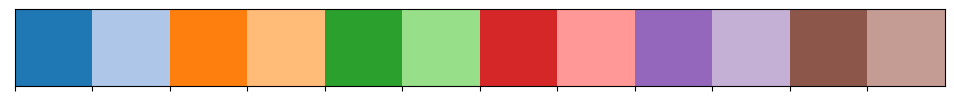

In [2]:
palette = sns.color_palette("tab20", 12)
sns.palplot(palette)

In [3]:
def readResults():
    # walk through results\8nodes\*\*\ and read all trace.csv files
    # return a list of dataframes
    results = []
    for root, dirs, files in os.walk(os.path.join('resultsTestruns', '8nodes')):
        for file in files:
            if file == 'trace.csv':
                workflow = root.split(os.sep)[2]
                if workflow not in workflows:
                    continue
                strategy = root.split(os.sep)[3]
                if strategy != 'cws-ceph':
                    continue
                run = root.split(os.sep)[4]
                if run != "1":
                    continue
                if "failed" in run:
                    continue
                print(root)
                data = pd.read_csv(os.path.join(root, file))
                data['wprocess'] = workflow + " " + data['process']
                data['Workflow'] = workflowNames[workflow]
                results.append( {
                    'workflow': workflow,
                    'strategy': strategy,
                    'run': run,
                    'data': data
                })
    return results

results = readResults()

resultsTestruns\8nodes\mag\cws-ceph\1
resultsTestruns\8nodes\rangeland\cws-ceph\1
resultsTestruns\8nodes\rnaseq\cws-ceph\1
resultsTestruns\8nodes\rnaseqDrosophila\cws-ceph\1
resultsTestruns\8nodes\sarek\cws-ceph\1


In [4]:
processes = set()
for r in results:
    if r["workflow"] in workflows:
        processes.update(list(r["data"]["process"]))
processes
endings = {}
for p in processes:
    k = p.split(":")[-1]
    if k in endings:
        endings[k].append(p)
    else:
        endings[k] = [p]
endings
for k in endings:
    if len(endings[k]) > 1:
        print(k, endings[k])

SAMTOOLS_MPILEUP ['NFCORE_SAREK:SAREK:BAM_VARIANT_CALLING_TUMOR_ONLY_ALL:BAM_VARIANT_CALLING_MPILEUP:SAMTOOLS_MPILEUP', 'NFCORE_SAREK:SAREK:BAM_VARIANT_CALLING_GERMLINE_ALL:BAM_VARIANT_CALLING_MPILEUP:SAMTOOLS_MPILEUP']
MULTIQC ['NFCORE_RNASEQ:RNASEQ:MULTIQC', 'NFCORE_RANGELAND:RANGELAND:MULTIQC', 'NFCORE_MAG:MAG:MULTIQC', 'NFCORE_SAREK:SAREK:MULTIQC']
FASTP ['NFCORE_SAREK:SAREK:FASTP', 'NFCORE_MAG:MAG:FASTP']
SALMON_SE_GENE_SCALED ['NFCORE_RNASEQ:RNASEQ:QUANTIFY_STAR_SALMON:SALMON_SE_GENE_SCALED', 'NFCORE_RNASEQ:RNASEQ:QUANTIFY_SALMON:SALMON_SE_GENE_SCALED']
SAMTOOLS_FLAGSTAT ['NFCORE_RNASEQ:RNASEQ:BAM_MARKDUPLICATES_PICARD:BAM_STATS_SAMTOOLS:SAMTOOLS_FLAGSTAT', 'NFCORE_RNASEQ:RNASEQ:ALIGN_STAR:BAM_SORT_STATS_SAMTOOLS:BAM_STATS_SAMTOOLS:SAMTOOLS_FLAGSTAT']
TIDDIT_SV ['NFCORE_SAREK:SAREK:BAM_VARIANT_CALLING_TUMOR_ONLY_ALL:BAM_VARIANT_CALLING_SINGLE_TIDDIT:TIDDIT_SV', 'NFCORE_SAREK:SAREK:BAM_VARIANT_CALLING_GERMLINE_ALL:BAM_VARIANT_CALLING_SINGLE_TIDDIT:TIDDIT_SV']
SAMTOOLS_INDEX ['NFCO

In [5]:
# memory distribution over processes

from matplotlib.ticker import MultipleLocator
from sklearn.linear_model import LinearRegression
import pandas as pd

def fitLocally( x, y, value ):
    valueToUse = 100
    model = LinearRegression()
    absolute_diff = np.abs(x - value)
    closest_valuesX = np.array(x.iloc[absolute_diff.argsort()[:valueToUse]]).reshape(-1, 1)
    closest_valuesY = y.iloc[absolute_diff.argsort()[:valueToUse]]
    model.fit(closest_valuesX, closest_valuesY)
    return model.predict([[value]])

def fitLocally2( x, y, value ):
    model = LinearRegression()
    closest_valuesX = np.array(x).reshape(-1, 1)
    closest_valuesY = np.array(y)
    maxDiff = max(np.abs(x - value)) ** 2
    weight = np.maximum(0, 1 - (np.abs(x - value) ** 2 / maxDiff))
    model.fit(closest_valuesX, closest_valuesY, weight )
    return model.predict([[value]])

def common_prefix(strings):
    prefix = strings[0]
    for string in strings[1:]:
        while not string.startswith(prefix):
            prefix = prefix[:-1]
            if not prefix:
                return ''
    return prefix

def calculateOffset( x, y, model ):
    r = 0
    for i in range(len(x)):
        x1 = x.iloc[i]
        y1 = y.iloc[i]
        y2 = model.predict([[x1]])[0]
        r += (y1 - y2) ** 2
    return (r * 1 / ( len(x) - 1 )) ** 0.5


def plotWorkflowForPredictor( combined_df, by, xName, saveas = None, filterProcess = None, processFilter = 'wprocess', yTicks = None, loc = None, xlim = None ):

    errorLinearRegression = 0
    errorWeightedRegression = 0
    errorCountLinearRegression = 0
    errorCountWeightedRegression = 0
    errorPercentile = 0
    errorCountPercentile = 0


    if ( filterProcess != None ):
        combined_df = combined_df[combined_df[processFilter] == filterProcess]

    # Set the minimum count for a process to be included in the plot
    min_count = 10
    # Get unique processes
    corr = combined_df.groupby(processFilter).apply(lambda x: abs(x['input_size'].corr(x['usedMemory']))).rename('correlation')
    count = combined_df[processFilter].groupby(combined_df[processFilter]).count()

    grouped = corr.to_frame().join(count).sort_values('correlation', ascending=False)
        

    unique_processes = list(grouped[processFilter][grouped[processFilter] > min_count].index)
    #common_prefix_processes = common_prefix(unique_processes)

    rows = min(3, len(unique_processes))

    # Calculate the number of rows required
    num_rows = (len(unique_processes) + rows - 1) // rows

    # Set up the overall figure and axis
    fig, axes = plt.subplots(nrows=num_rows, ncols=rows, figsize=(3.5 if filterProcess != None else 20, 2.3 if filterProcess != None else 4*num_rows ))

    # Flatten the axes array for easier indexing
    if ( num_rows * rows == 1):
        axes = [axes]
    else:
        axes = axes.flatten()

    # Iterate over unique processes
    for i, process in enumerate(unique_processes):
        # Filter dataframe for the current process
        df_process = combined_df[combined_df[processFilter] == process]

        unit = "MB"

        if ( len(df_process) > 1 ):
            pearson_corr = df_process['input_size'].corr(df_process['usedMemory'])
            pearson_corr = f"{pearson_corr:.2f}"
            if filterProcess != None:
                print(f"Process: {process} pearson: {pearson_corr}")
        
        if ( processFilter == 'wprocess'):
            sns.scatterplot(data=df_process, x=by+unit, y='usedMemory', ax=axes[i], color = 'green', zorder=3)

            model = LinearRegression()
            model.fit(np.array(df_process[[by+unit]]), df_process['usedMemory'])
            x = np.array([[df_process[by+unit].min() - 10000], [df_process[by+unit].max() + 10000]])
            std = calculateOffset( df_process[by+unit], df_process['usedMemory'], model ) #np.std(df_process['usedMemory'])
            y = model.predict(x)
            axes[i].plot(x, y, color='red')
            axes[i].plot(x, y + std, color='green')
            #axes[i].plot(x, y + max(std, 128), color='green')

            #x = np.linspace(df_process[by+unit].min(), df_process[by+unit].max(), 100)
            #y = [ fitLocally(df_process[by+unit], df_process['usedMemory'], x1) for x1 in x ]
            #axes[i].plot(x, y, color='orange')
            #axes[i].plot(x, np.array(y) + max(std, 128), color='orange')

            # x = np.linspace(df_process[by+unit].min(), df_process[by+unit].max(), 100)
            # y = [ fitLocally2(np.array(df_process[by+unit]), np.array(df_process['usedMemory']), x1) for x1 in x ]
            # axes[i].plot(x, y, color='orange')
            # axes[i].plot(x, np.array(y) + max(std, 128), color='orange')

            percentile = df_process['usedMemory'].quantile(0.95)
            axes[i].axhline(percentile, color='blue', linestyle='--')

            x = np.array(df_process[by+unit])
            y = np.array(df_process['usedMemory'])
            used = np.array(df_process['usedMemory'])
            requested = np.array(df_process['requestedMemory'])
            time = np.array(df_process['realtime']) / 1000 / 3600
            if ( xlim is not None ):
                axes[i].set_xlim(xlim)
            else:
                axes[i].set_xlim([df_process[by+unit].min() - df_process[by+unit].max() * 0.04, df_process[by+unit].max() * 1.04])
            axes[i].set_ylim([df_process['usedMemory'].min() - df_process['usedMemory'].max() * 0.04, df_process['usedMemory'].max() * 1.04])

            for j in range(len(x)):
                linearPrediction = model.predict([[x[j]]])[0] + std
                weightedPrediction = fitLocally2(x, y, x[j])[0] + std
                percentilePrediction = percentile
                userMemory = requested[j]

                if ( used[j] > linearPrediction ):
                    errorLinearRegression += (linearPrediction + userMemory - used[j]) * time[j]
                    errorCountLinearRegression += 1
                else:
                    errorLinearRegression += (linearPrediction - used[j]) * time[j]

                if ( used[j] > weightedPrediction ):
                    errorWeightedRegression += (weightedPrediction + userMemory - used[j]) * time[j]
                    errorCountWeightedRegression += 1
                else:
                    errorWeightedRegression += (weightedPrediction - used[j]) * time[j]

                if ( used[j] > percentilePrediction ):
                    errorPercentile += (percentilePrediction + userMemory - used[j]) * time[j]
                    errorCountPercentile += 1
                else:
                    errorPercentile += (percentilePrediction - used[j]) * time[j]
        else:
            for p in df_process['wprocess'].unique():
                l = workflowNames[ p.split(" ")[0]]
                sns.scatterplot(data=df_process[df_process['wprocess'] == p], x=by+unit, y='usedMemory', ax=axes[i], zorder=3, label=l)
            if ( xlim is not None ):
                axes[i].set_xlim(xlim)

        
        if ( yTicks is not None ):
            axes[i].set_yticks(yTicks)

        # Set title and labels for the subplot
        if filterProcess is None:
            axes[i].set_title(f'Process: {process} pearson: {pearson_corr}', fontsize=10)
        if unit == "":
            unit = "B"
        axes[i].set_xlabel(xName + " in " + unit)
        axes[i].set_ylabel('Peak Memory in MB')
        formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
        axes[i].xaxis.set_major_formatter(formatter)
        axes[i].yaxis.set_major_formatter(formatter)

    # Hide unused subplots
    for j in range(len(unique_processes), num_rows * rows):
        fig.delaxes(axes[j])

    if processFilter == 'process':
        plt.legend()
        if loc is not None:
            plt.legend(loc=loc)
    
    # Adjust layout
    plt.tight_layout(pad=1.5, h_pad=2, w_pad=2)

    if saveas is not None:
        plt.savefig(saveas)
    plt.show()

    print(f"Error Linear Regression:   {int(errorLinearRegression)}{unit}/h, {errorCountLinearRegression}/{len(combined_df)} processes with underestimation")
    print(f"Error Weighted Regression: {int(errorWeightedRegression)}{unit}/h, {errorCountWeightedRegression}/{len(combined_df)} processes with underestimation")
    print(f"Error Percentile:          {int(errorPercentile)}{unit}/h, {errorCountPercentile}/{len(combined_df)} processes with underestimation")
    return combined_df

results_df = pd.concat([r['data'] for r in results], ignore_index=True)
results_df = results_df[results_df['status'] == "COMPLETED"]
results_df["peak_rss"] = pd.to_numeric(results_df["peak_rss"])

#filter nan
results_df = results_df[results_df["peak_rss"].notna()]
results_df = results_df[results_df["input_size"].notna()]

results_df["usedMemory"] = results_df["peak_rss"] / 1024 / 1024
results_df["requestedMemory"] = results_df["memory"] / 1024 / 1024
results_df["input_sizeGB"] = pd.to_numeric(results_df["input_size"]) / 1024 / 1024 / 1024
results_df["input_sizeMB"] = pd.to_numeric(results_df["input_size"]) / 1024 / 1024
results_df["input_sizeKB"] = pd.to_numeric(results_df["input_size"]) / 1024

Process: NFCORE_RNASEQ:RNASEQ:BEDTOOLS_GENOMECOV pearson: -0.49


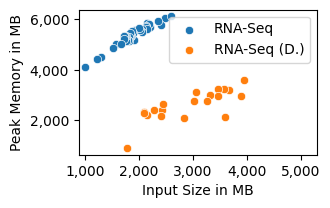

Error Linear Regression:   0MB/h, 0/59 processes with underestimation
Error Weighted Regression: 0MB/h, 0/59 processes with underestimation
Error Percentile:          0MB/h, 0/59 processes with underestimation


In [6]:
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/compareRNASeq.pdf", filterProcess= 'NFCORE_RNASEQ:RNASEQ:BEDTOOLS_GENOMECOV', processFilter = 'process', loc = 'upper right', xlim = [880, 5300])

Process: mag NFCORE_MAG:MAG:KRONA pearson: 1.00


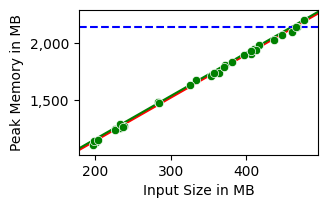

Error Linear Regression:   4354MB/h, 6/34 processes with underestimation
Error Weighted Regression: 4354MB/h, 6/34 processes with underestimation
Error Percentile:          2659MB/h, 2/34 processes with underestimation
............................................................................
Process: rnaseq NFCORE_RNASEQ:RNASEQ:QUALIMAP_RNASEQ pearson: -0.49


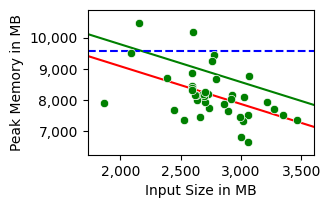

Error Linear Regression:   57617MB/h, 5/39 processes with underestimation
Error Weighted Regression: 57593MB/h, 5/39 processes with underestimation
Error Percentile:          32626MB/h, 2/39 processes with underestimation
............................................................................
Process: rangeland NFCORE_RANGELAND:RANGELAND:PREPROCESSING:FORCE_PREPROCESS pearson: -0.33


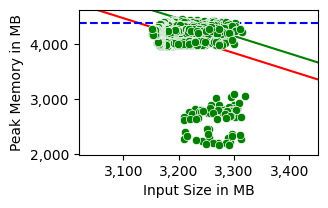

Error Linear Regression:   79244MB/h, 144/2072 processes with underestimation
Error Weighted Regression: 73175MB/h, 125/2072 processes with underestimation
Error Percentile:          45002MB/h, 104/2072 processes with underestimation
............................................................................
Process: sarek NFCORE_SAREK:SAREK:BAM_BASERECALIBRATOR:GATK4_BASERECALIBRATOR pearson: -0.00


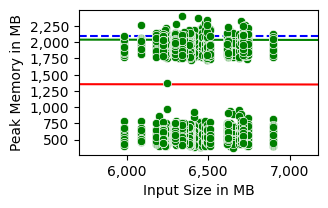

Error Linear Regression:   17683MB/h, 142/1512 processes with underestimation
Error Weighted Regression: 17683MB/h, 142/1512 processes with underestimation
Error Percentile:          12555MB/h, 76/1512 processes with underestimation


In [7]:
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/krona.pdf", filterProcess= 'mag NFCORE_MAG:MAG:KRONA')
print("............................................................................")
#_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/prokka.pdf", filterProcess= 'mag NFCORE_MAG:MAG:PROKKA')
#print("............................................................................")
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/qualimap.pdf", filterProcess= 'rnaseq NFCORE_RNASEQ:RNASEQ:QUALIMAP_RNASEQ')
print("............................................................................")
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/preprocessing.pdf", filterProcess= 'rangeland NFCORE_RANGELAND:RANGELAND:PREPROCESSING:FORCE_PREPROCESS')
print("............................................................................")
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/basecalibrator.pdf", filterProcess= 'sarek NFCORE_SAREK:SAREK:BAM_BASERECALIBRATOR:GATK4_BASERECALIBRATOR', yTicks=list(range(500,2500,250)))

C:\Users\Fabian Lehmann\AppData\Local\Temp\ipykernel_17100\4269284772.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


[]

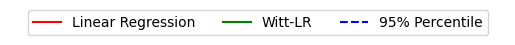

In [8]:
plt.figure(figsize=(6.4, .3))  # set smaller figure size for legend
plt.plot([], label='Linear Regression', color='red')
plt.plot([], label='Witt-LR', color='green')
plt.plot([], label='95% Percentile', color='blue', linestyle='--')
plt.legend(loc='center', ncol=3)

# Remove axis
plt.axis('off')
plt.tight_layout()
plt.savefig("plots/legend.pdf")

plt.plot()

c:\Users\Fabian Lehmann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Fabian Lehmann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


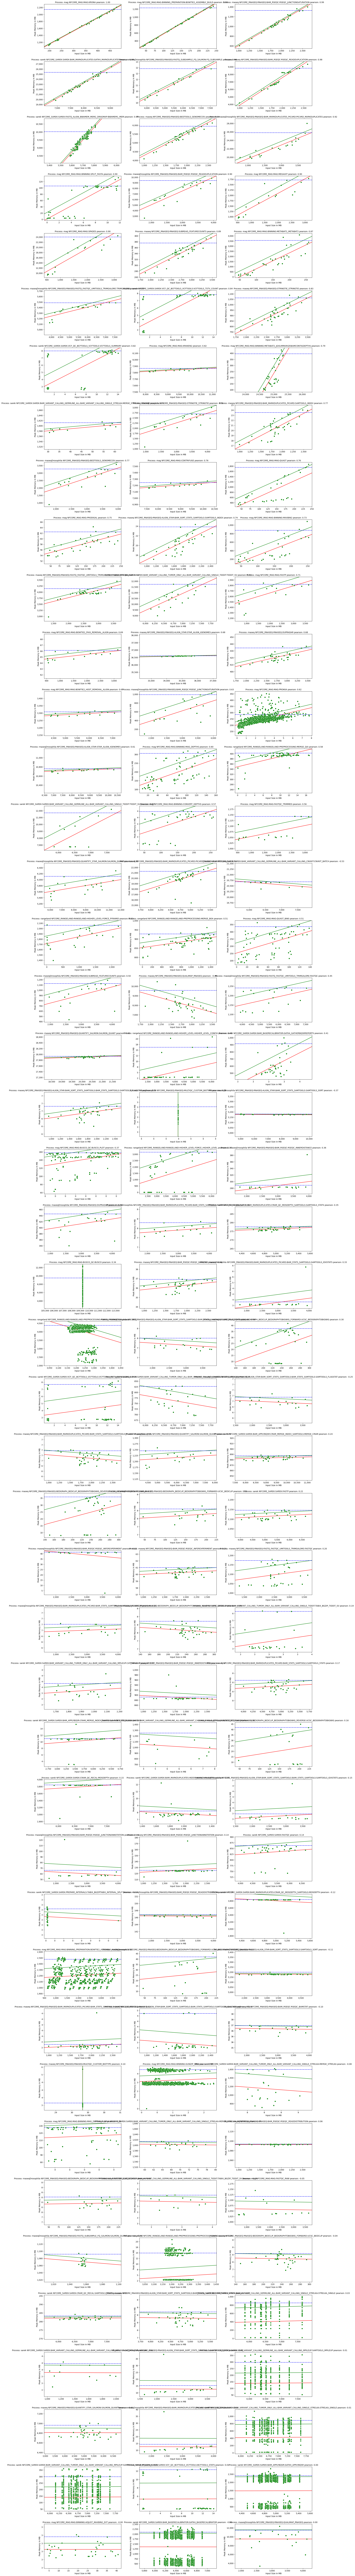

Error Linear Regression:   2527923MB/h, 3020/21438 processes with underestimation
Error Weighted Regression: 2374117MB/h, 2977/21438 processes with underestimation
Error Percentile:          1675553MB/h, 1094/21438 processes with underestimation


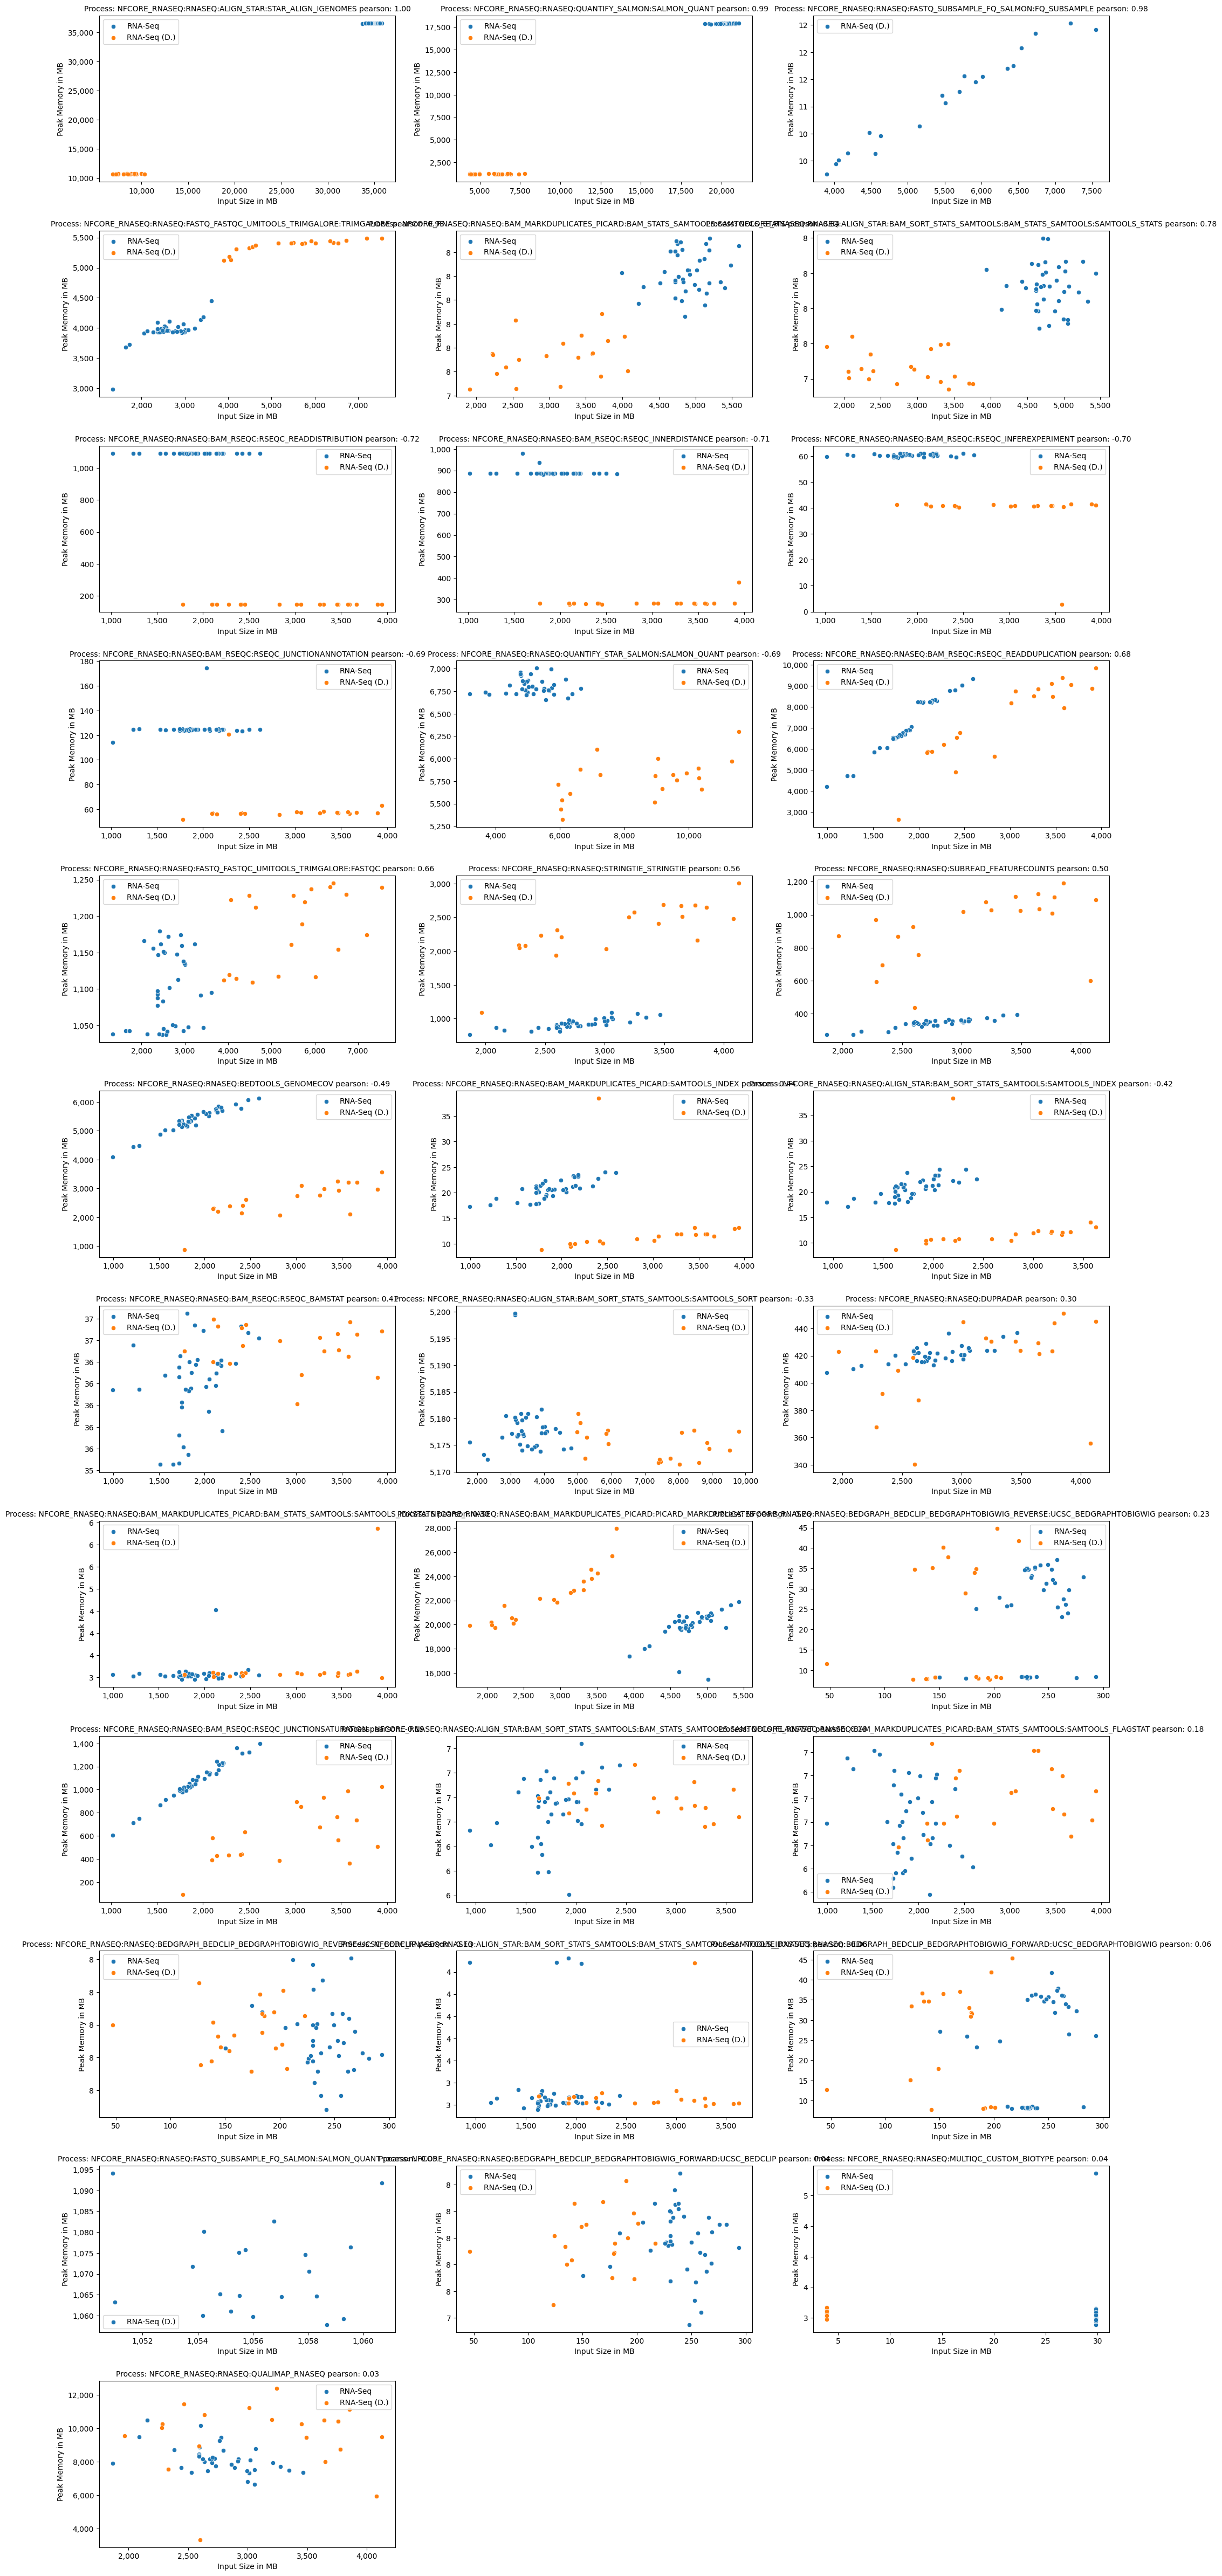

Error Linear Regression:   0MB/h, 0/1970 processes with underestimation
Error Weighted Regression: 0MB/h, 0/1970 processes with underestimation
Error Percentile:          0MB/h, 0/1970 processes with underestimation


In [9]:
# plot all tasks
_ = plotWorkflowForPredictor(results_df, 'input_size', 'Input Size', saveas = "plots/memory.pdf" )#, filterProcess= 'NFCORE_CHIPSEQ:CHIPSEQ:FILTER_BAM_BAMTOOLS:BAM_SORT_SAMTOOLS:SAMTOOLS_SORT')
_ = plotWorkflowForPredictor(results_df[results_df["wprocess"].str.contains("rnaseq")], 'input_size', 'Input Size', saveas = "plots/memoryRNASeq.pdf", processFilter = 'process' )

In [10]:
successfull = results_df[results_df["status"] == "COMPLETED"]
successfull["GB/Core"] = (successfull["memory"] / 1024 / 1024 / 1024) / successfull["cpus"]
successfull["GB/CoreUsed"] = (successfull["usedMemory"] / 1024) / successfull["cpus"]

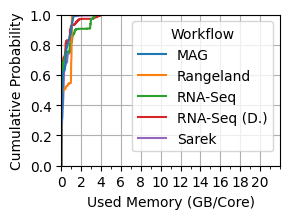

Use less than 4GB/Core:  0.9988804925832634
Use less than 2GB/Core:  0.9903908946730106


In [11]:
plt.figure(figsize=(3, 2.3))
sns.ecdfplot(data=successfull, x="GB/CoreUsed", hue='Workflow')
plt.grid(True)
plt.xlabel('Used Memory (GB/Core)')
plt.ylabel('Cumulative Probability')
plt.xticks(range(0, 21, 2))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim(0, 22)
plt.tight_layout()
plt.savefig("plots/ecdfUsedMemory.pdf")
plt.show()

#used memory is below 4GB/Core
print( "Use less than 4GB/Core: ", (successfull["GB/CoreUsed"] <= 4).sum() / len(successfull) )
print( "Use less than 2GB/Core: ", (successfull["GB/CoreUsed"] <= 2).sum() / len(successfull) )

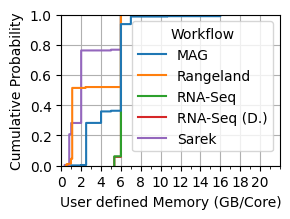

Share Sarek has <2GB 0.7622443487621098
Share Sarek has <6GB 1.0
Request less than 2GB/Core:  0.37190969306838323


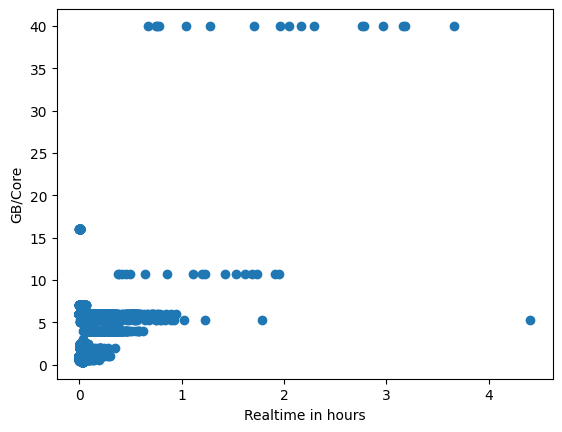

0.2551804937749041

In [12]:
plt.figure(figsize=(3, 2.3))
sns.ecdfplot(data=successfull, x="GB/Core", hue='Workflow')
plt.grid(True)
plt.xlabel('User defined Memory (GB/Core)')
plt.ylabel('Cumulative Probability')
plt.xticks(range(0, 21, 2))
plt.gca().xaxis.set_minor_locator(ticker.MultipleLocator(1))
plt.xlim(0, 22)
plt.tight_layout()
plt.savefig("plots/ecdfUserMemory.pdf")
plt.show()

successfullSarek = successfull[successfull["Workflow"] == workflowNames["sarek"]]
print( "Share Sarek has <2GB",(successfullSarek["GB/Core"] <= 2).sum() / len(successfullSarek))
print( "Share Sarek has <6GB",(successfullSarek["GB/Core"] <= 6).sum() / len(successfullSarek))

print( "Request less than 2GB/Core: ", (successfull["GB/Core"] <= 2).sum() / len(successfull) )

# find line with max "GB/Core" in successfull
successfull[successfull["GB/Core"] == successfull["GB/Core"].max()]["realtime"]/1000/3600#[["process","Workflow","GB/Core"]].groupby(["process","Workflow","GB/Core"]).count()

plt.scatter(successfull["realtime"]/1000/3600, successfull["GB/Core"])
plt.xlabel('Realtime in hours')
plt.ylabel('GB/Core')
plt.show()
#corelation between realtime and GB/Core
pd.to_numeric(successfull["realtime"]).corr(successfull["GB/Core"])

In [13]:
corrSuccessfull = successfull.groupby("wprocess").apply(lambda x: abs(x['input_size'].corr(x['usedMemory']))).rename('correlation')
countSuccessfull = corrSuccessfull[corrSuccessfull.notna()]
print( "Share of tasks with linear relationship",(corrSuccessfull > 0.3).sum() / len(countSuccessfull) )

Share of tasks with linear relationship 0.5220588235294118


c:\Users\Fabian Lehmann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2846: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
c:\Users\Fabian Lehmann\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\lib\function_base.py:2705: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)


In [14]:
# latex table for workflow characteristics (#Inputdata, #Abstract und #physical Tasks, Median physical Tasks / abstract)
filesToProcess = {
    'rnaseqDrosophila' : 20,
    'sarek' : 36, 
    'mag' : 17,
    'rangeland' : 2072, 
    'rnaseq' : 39
}

print("""\\begin{table}[!h]
    \\centering
    \\caption{Workflow characteristics}
    \\begin{tabular}{l|r|r|r|r}
    """)

print("        \\small")
print("        \multirow{1}{*}{Workflow} & \multicolumn{1}{m{1cm}|}{\centering Abstract Tasks} & \multicolumn{1}{m{1cm}|}{\centering Physical Tasks} & \multicolumn{1}{m{1cm}|}{\centering Median Physical Tasks} & \multicolumn{1}{m{1cm}}{\centering Inputs} \\\\")
print("        \\hline")

for workflow in workflows:
    for r in results:
        if r["workflow"] != workflow:
            continue
        if r["strategy"] != "cws-ceph":
            continue
        data = r["data"]
        abstractTasks = len(data["process"].unique())
        physicalFilter = data["status"] == "COMPLETED"
        physicalTasks = (physicalFilter).sum()
        medianPhysicalTasks = data[physicalFilter][["process", "name"]].groupby(["process"]).count()["name"].median()
        print( "        " + " & ".join([workflowNames[workflow], "{:,}".format(abstractTasks), "{:,}".format(physicalTasks), "{:,}".format(medianPhysicalTasks), "{:,}".format(filesToProcess[workflow])]) + " \\\\" )
print("""        
    \\end{tabular}
    \\label{tab:workflowCharacteristics}
\\end{table}""")


\begin{table}[!h]
    \centering
    \caption{Workflow characteristics}
    \begin{tabular}{l|r|r|r|r}
    
        \small
        \multirow{1}{*}{Workflow} & \multicolumn{1}{m{1cm}|}{\centering Abstract Tasks} & \multicolumn{1}{m{1cm}|}{\centering Physical Tasks} & \multicolumn{1}{m{1cm}|}{\centering Median Physical Tasks} & \multicolumn{1}{m{1cm}}{\centering Inputs} \\
        \hline
        RNA-Seq (D.) & 55 & 701 & 20.0 & 20 \\
        RNA-Seq & 53 & 1,269 & 39.0 & 39 \\
        Sarek & 45 & 7,432 & 36.0 & 36 \\
        MAG & 38 & 7,618 & 17.0 & 17 \\
        Rangeland & 12 & 4,418 & 35.5 & 2,072 \\
        
    \end{tabular}
    \label{tab:workflowCharacteristics}
\end{table}


Length of mag is different
Length of cws: 7618
Length of lr: 7615


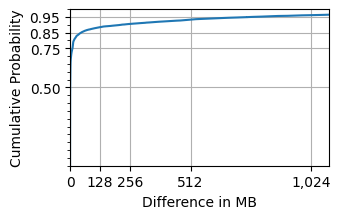

count    14740.000000
mean       113.491983
std        404.772377
min          0.000000
25%          0.117188
50%          0.679688
75%         10.632812
max       5706.988281
Name: diffinMB, dtype: float64
85th percentile 48.10683593749999
90th percentile 219.84257812500007
95th percentile 783.8275390624996
99th percentile 2134.9853515625
99.9th percentile 3708.4282656250866
Smaller than 1MB 0.5430800542740841
Smaller than 128MB 0.8841248303934871
Smaller than 256MB 0.9047489823609226
Higher than 512MB 0.06784260515603799


In [15]:
# compare memory consumption for the same process in different executions
def readResultsToCompare():
    resultsInMB = []
    for workflow in workflows:
        cwsRun = pd.read_csv(os.path.join("resultsTestruns", "8nodes", workflow, 'cws-ceph', '1', 'trace.csv'))
        cwsRun = cwsRun[cwsRun["status"] == "COMPLETED"]
        lrRun = pd.read_csv(os.path.join("resultsTestruns", "8nodes", workflow, 'cwslr-ceph', '1', 'trace.csv'))
        lrRun = lrRun[lrRun["status"] == "COMPLETED"]
        if len(cwsRun) != len(lrRun):
            print(f"Length of {workflow} is different")
            print(f"Length of cws: {len(cwsRun)}")
            print(f"Length of lr: {len(lrRun)}")
        # join the two dataframes by name
        cwsRun = cwsRun.set_index("name")
        lrRun = lrRun.set_index("name")
        # remove all rows where the name is duplicated
        cwsRun = cwsRun[~cwsRun.index.duplicated(keep='first')]
        lrRun = lrRun[~lrRun.index.duplicated(keep='first')]
        joined = cwsRun.join(lrRun, lsuffix="_cws", rsuffix="_lr")
        if ( len(joined) != len(joined.index.unique()) ):
            print(f"Length of {workflow} is different after join")
            print(f"Length of cws: {len(cwsRun)}")
            print(f"Length of lr: {len(lrRun)}")
            print(f"Length of joined: {len(joined)}")
        joined["diffinMB"] = (pd.to_numeric(joined["peak_rss_lr"]) - pd.to_numeric(joined["peak_rss_cws"])).abs() / 1024 / 1024
        joined["workflow"] = workflow
        joined = joined[joined["diffinMB"].notna()]
        resultsInMB.append(joined[["diffinMB", "workflow"]])
    return pd.concat([r for r in resultsInMB]).sort_values("diffinMB")

diffInMB = readResultsToCompare()
diffInMB
# plot cumulative distribution
sorted_diff = np.sort(diffInMB["diffinMB"])

# Calculate the cumulative distribution
cumulative = np.linspace(0, 1, len(sorted_diff))

# Plotting
plt.figure(figsize=(3.5, 2.3))
plt.plot(sorted_diff, cumulative)
plt.xlabel('Difference in MB')
plt.ylabel('Cumulative Probability')
plt.grid(True)
plt.xlim([0, 1100])
plt.ylim([0, 1])
power_of_2_ticks = [0, 128, 256, 512, 1024]
plt.xticks(power_of_2_ticks)

plt.gca().yaxis.set_minor_locator(ticker.MultipleLocator(0.05))
plt.yticks([0.5, 0.75, 0.85, 0.95])
plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.tight_layout()
plt.savefig("plots/cumulative.pdf")
plt.show()

print(diffInMB["diffinMB"].describe())
print("85th percentile", diffInMB["diffinMB"].quantile(0.85))
print("90th percentile", diffInMB["diffinMB"].quantile(0.9))
print("95th percentile", diffInMB["diffinMB"].quantile(0.95))
print("99th percentile", diffInMB["diffinMB"].quantile(0.99))
print("99.9th percentile", diffInMB["diffinMB"].quantile(0.999))
print("Smaller than 1MB", len(diffInMB[diffInMB["diffinMB"] < 1]) / len(diffInMB))
print("Smaller than 128MB", len(diffInMB[diffInMB["diffinMB"] < 128]) / len(diffInMB))
print("Smaller than 256MB", len(diffInMB[diffInMB["diffinMB"] < 256]) / len(diffInMB))
print("Higher than 512MB", len(diffInMB[diffInMB["diffinMB"] > 512]) / len(diffInMB))

In [16]:
# find abstract tasks that are not in the other workflow
a = pd.read_csv(os.path.join("resultsTestruns", "8nodes", "rnaseq", 'cws-ceph', '1', 'trace.csv'))["process"].unique()
b = pd.read_csv(os.path.join("resultsTestruns", "8nodes", "rnaseqDrosophila", 'cws-ceph', '1', 'trace.csv'))["process"].unique()
set(b) - set(a)

{'NFCORE_RNASEQ:RNASEQ:FASTQ_SUBSAMPLE_FQ_SALMON:FQ_SUBSAMPLE',
 'NFCORE_RNASEQ:RNASEQ:FASTQ_SUBSAMPLE_FQ_SALMON:SALMON_QUANT'}

In [17]:
results_df

import random

def generate_unique_numbers(maxNumber, length, seed):
    random.seed(seed)
    numbers = random.sample(range(maxNumber), length)
    return numbers

def calculateError( df_process, xSamples, seed ):
    uniqueNumbers = generate_unique_numbers(len(df_process), xSamples, seed)
    train = df_process.iloc[uniqueNumbers]
    test = df_process.drop(uniqueNumbers)
    model = LinearRegression()
    model.fit(np.array(train[["input_sizeMB"]]), train['usedMemory'])
    std = max(128, calculateOffset( train["input_sizeMB"], train['usedMemory'], model))
    y = model.predict(np.array(test[["input_sizeMB"]]))
    error = 0
    errorCount = 0
    for i in range(len(y)):
        used = test["usedMemory"].iloc[i]
        predicted = y[i] + std
        userMemory = test["requestedMemory"].iloc[i]
        runtime = test["realtime"].iloc[i] / 1000 / 3600
        if ( used > predicted ):
            error += (predicted + userMemory - used) * runtime
            errorCount += 1
        else:
            error += (predicted - used) * runtime
    return error / len(y), errorCount / len(y)

def calculateErrorWithXSamples( combined_df, xSamples ):
    totalError = 0
    totalErrorCount = 0
    min_count = 33
    if min_count < xSamples:
        print("Error: xSamples must be smaller than min_count")
        return
    # Get unique processes
    unique_processes = list(combined_df["process"].unique())
    # Iterate over unique processes
    for i, process in enumerate(unique_processes):
        # Filter dataframe for the current process
        df_process = combined_df[combined_df["process"] == process].reset_index()
        if len(df_process) < min_count:
            continue
        pearson_corr = df_process['input_size'].corr(df_process['usedMemory'])
        if pearson_corr < 0.3:
            continue
        error = 0
        errorCount = 0
        iters = 10
        for j in range( iters ):
            a,b = calculateError( df_process, xSamples, j )
            error += a
            errorCount += b
        totalError += error / iters
        totalErrorCount += errorCount / iters
    return totalError / len(unique_processes), totalErrorCount / len(unique_processes)

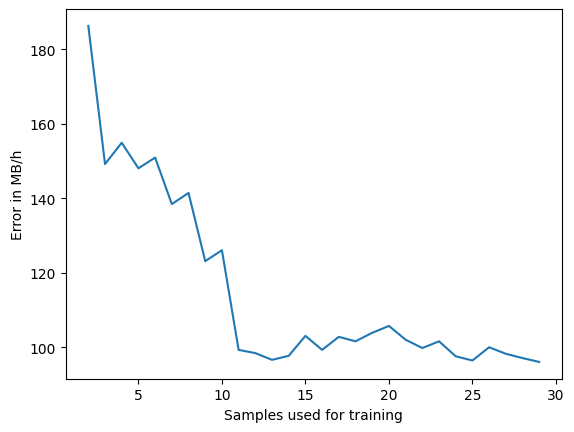

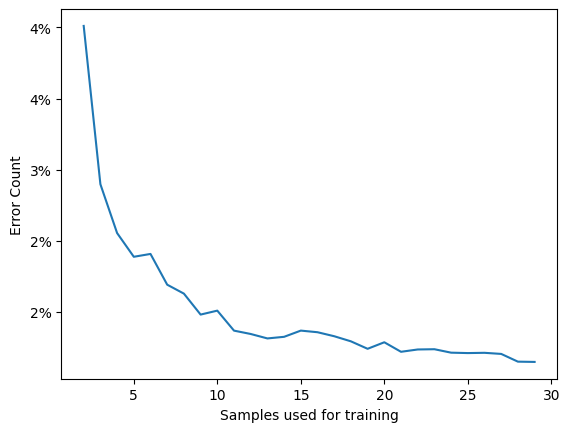

In [18]:
absoluteError = []
errorCount = []
maxSamples = 30
start = 2
for i in range(start, maxSamples):
    a,b = calculateErrorWithXSamples( results_df, i )
    absoluteError.append(a)
    errorCount.append(b)


plt.plot(range(start, maxSamples), absoluteError)
plt.ylabel('Error in MB/h')
plt.xlabel('Samples used for training')
plt.show()
plt.plot(range(start, maxSamples), errorCount)
plt.ylabel('Error Count')
plt.xlabel('Samples used for training')
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:.0%}'.format(y)))
plt.show()

In [19]:
byteMsToGBHours = 1000 * 3600 * 1024 * 1024 * 1024

def joinFailed( failed, completed ):
    # merge the two dataframes by name and input_size
    failed = failed.set_index(["name", "input_size"])
    completed = completed.set_index(["name", "input_size"])
    joined = failed.join(completed, lsuffix="_failed", rsuffix="_completed")
    # find all rows that could not be merged
    if len(failed) != len(joined) or joined["status_completed"].isna().sum() > 0:
        print("Could not merge all rows")
        print(f"Length of failed: {len(failed)}")
        print(f"Length of completed: {len(completed)}")
        print(f"Length of joined: {len(joined)}")
        joined[joined["status_completed"].isna()]
        return None
    return joined

def readTrace( folder, workflow, run, strategy ):
    trace = pd.read_csv( os.path.join(folder, "trace.csv"), sep="," )
    trace["workflow_run"] = run
    trace["strategy"] = strategy
    trace["Workflow"] = workflowNames[workflow]
    trace["Strategy"] = strategyNames[strategy]
    trace["Group"] = strategyGroups[strategy]
    
    trace['scheduling'] = strategyNames[strategy].split(" ")[0]
    trace['sizing'] = strategyNames[strategy].split(" ")[1]
    sizingStrategy = True
    if "memory_adapted" not in trace:
        trace["memory_adapted"] = "-"
        sizingStrategy = False
    trace["memoryUsed"] = pd.to_numeric(trace["memory_adapted"].replace("-", np.nan).combine_first(trace["memory"]))
    success = trace[trace["status"] == "COMPLETED"]
    unsucessfull = trace[trace["status"] != "COMPLETED"]

    wastedSuccessful = (success["memoryUsed"] - pd.to_numeric(success["peak_rss"])).clip(lower=0) * success["realtime"] / byteMsToGBHours
    wastedSuccessful = wastedSuccessful.sum()
    wastedUnsuccessful = unsucessfull["memoryUsed"] * unsucessfull["realtime"] / byteMsToGBHours
    wastedUnsuccessful = wastedUnsuccessful.sum()

    failedAfterSizing = ((trace["status"] != "COMPLETED") & (trace["memory_adapted"] != "-")).sum()
    notFailedAfterSizing = ((trace["status"] == "COMPLETED") & (trace["memory_adapted"] != "-")).sum()
    failedNoSizing = ((trace["status"] != "COMPLETED") & (trace["memory_adapted"] == "-")).sum()
    notFailedNoSizing = ((trace["status"] == "COMPLETED") & (trace["memory_adapted"] == "-")).sum()

    memoryTimeRequested = trace["memoryUsed"] * trace["realtime"] / byteMsToGBHours
    memoryTimeRequested = memoryTimeRequested.sum()
    memoryTimeUsed = pd.to_numeric(success["peak_rss"]) * success["realtime"] / byteMsToGBHours
    memoryTimeUsed = memoryTimeUsed.sum()
    memoryTimeWastedTotal = memoryTimeRequested.sum() - memoryTimeUsed.sum()
    maq = memoryTimeUsed.sum() / memoryTimeRequested.sum()

    start = trace["submit"].min()
    end = trace["complete"].max()
    makespan = None
    try:
        makespan = (int(end) - int(start)) / 1000 / 3600
    except:
        print( "Error calculating makespan for " + folder )

    cpuTime = (trace["realtime"] * trace["cpus"] / 1000 / 3600).sum()
    memoryTime = (trace["realtime"] * trace["memoryUsed"] / byteMsToGBHours).sum()
    availableInClusterCPU = 32 * 8
    clusterUsageCPU = cpuTime / makespan / availableInClusterCPU

    availableInClusterMem = 96 * 8
    clusterUsageMem = memoryTime / makespan / availableInClusterMem

    #trace["status"]

    failedMerged = None if not sizingStrategy else joinFailed( unsucessfull, success )

    d = {
        "wastedSuccessful": wastedSuccessful,
        "wastedUnsuccessful": wastedUnsuccessful,
        "failedAfterSizing": failedAfterSizing,
        "notFailedAfterSizing": notFailedAfterSizing,
        "failedNoSizing": failedNoSizing,
        "notFailedNoSizing": notFailedNoSizing,
        "memoryTimeRequested": memoryTimeRequested,
        "memoryTimeUsed": memoryTimeUsed,
        "memoryTimeWastedTotal": memoryTimeWastedTotal,
        "maq": maq,
        "makespan": makespan,
        "cpuTime": cpuTime,
        "memoryTime": memoryTime,
        "clusterUsageCPU" : clusterUsageCPU,
        "clusterUsageMem" : clusterUsageMem,
    }

    return { "data": d, "trace": trace, "failed": failedMerged }

def readFinalResults():
    results = []
    resultsMedian = []
    for workflow in workflowsEval:
        if workflow not in workflowsEval:
            print("Skipping " + workflow)
            continue
        for strategy in os.listdir(os.path.join('results', '8nodes', workflow)):
            if "ponderweighted2" in strategy:
                continue
            resultsRun = []
            print(os.path.join('results', '8nodes', workflow, strategy))
            for run in os.listdir(os.path.join('results', '8nodes', workflow, strategy)):
                root = os.path.join('results', '8nodes', workflow, strategy, run)
                if "failed" in run:
                    continue
                if not os.path.exists(os.path.join(root, "trace.csv")):
                    continue
                d = {
                        'workflow': workflow,
                        'strategy': strategy,
                        "Workflow" : workflowNames[workflow],
                        "Strategy" : strategyNames[strategy],
                        "Group" : strategyGroups[strategy],
                        'run': run,
                        'scheduling': strategyNames[strategy].split(" ")[0],
                        'sizing' : strategyNames[strategy].split(" ")[1]
                        #'data': data
                    }
                t = readTrace( root, workflow, run, strategy )
                for k in t["data"]:
                    d[k] = t["data"][k]
                v = { "data": d, "trace": t["trace"], "failed" : None if "failed" not in t else t["failed"] }
                results.append( v )
                resultsRun.append( v )
            if len(resultsRun) != 3:
                print("Only " + str(len(resultsRun)) + " runs for " + workflow + " " + strategy)
            # find median run
            resultsRun = sorted(resultsRun, key=lambda x: x["data"]["makespan"])
            resultsMedian.append(resultsRun[len(resultsRun) // 2])
    return results, resultsMedian

finalResultsData, finalResultsDataMedian = readFinalResults()
finalResults = pd.DataFrame([ f["data"] for f in finalResultsData])
finalResultsMedianRun = pd.DataFrame([ f["data"] for f in finalResultsDataMedian])
finalResults = finalResults


results\8nodes\rnaseq\cws-ceph
results\8nodes\rnaseq\cwslr-ceph
results\8nodes\rnaseq\cwsponderweighted-ceph
results\8nodes\rnaseq\gslr-ceph
results\8nodes\rnaseq\gsmlr-ceph
results\8nodes\rnaseq\gsmponderweighted-ceph
results\8nodes\rnaseq\gsponderweighted-ceph
results\8nodes\rnaseq\lfflr-ceph
results\8nodes\rnaseq\lffmaxlr-ceph
results\8nodes\rnaseq\lffmaxponderweighted-ceph
results\8nodes\rnaseq\lffponderweighted-ceph
results\8nodes\rnaseq\orig-ceph
results\8nodes\sarek\cws-ceph
results\8nodes\sarek\cwslr-ceph
Could not merge all rows
Length of failed: 2511
Length of completed: 7432
Length of joined: 29335
Could not merge all rows
Length of failed: 2723
Length of completed: 7432
Length of joined: 30850
Could not merge all rows
Length of failed: 2379
Length of completed: 7432
Length of joined: 27914
results\8nodes\sarek\cwsponderweighted-ceph
Could not merge all rows
Length of failed: 328
Length of completed: 7432
Length of joined: 4347
Could not merge all rows
Length of failed: 125


In [20]:
pd.concat([f["trace"] for f in finalResultsData]).to_csv("allTraces.csv")


In [21]:
strategy_order = [strategyNames[x] for x in ['orig-ceph','cws-ceph', 'cwslr-ceph', 'lfflr-ceph', 'lffmaxlr-ceph', 'gslr-ceph', 'gsmlr-ceph', 'cwsponderweighted-ceph', 'lffponderweighted-ceph', 'lffmaxponderweighted-ceph', 'gsponderweighted-ceph', 'gsmponderweighted-ceph']]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


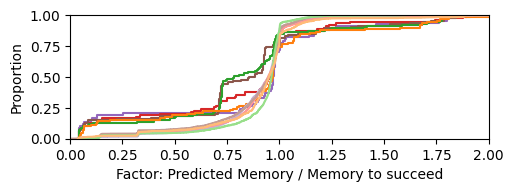

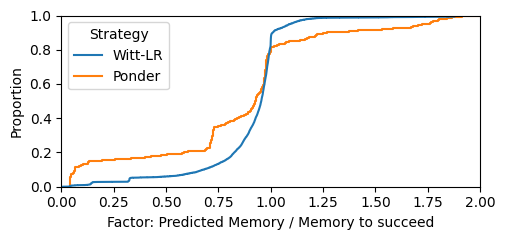

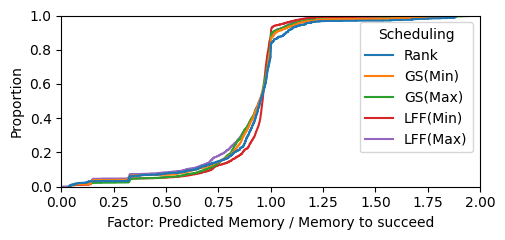

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


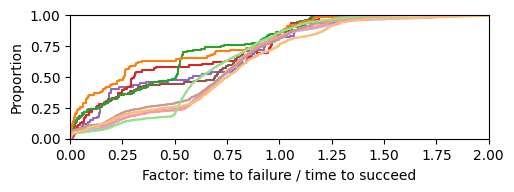

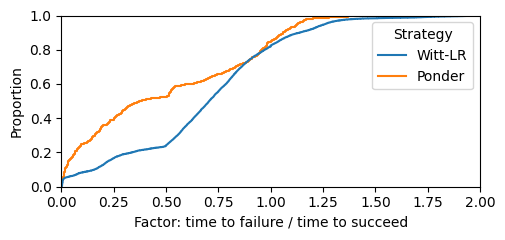

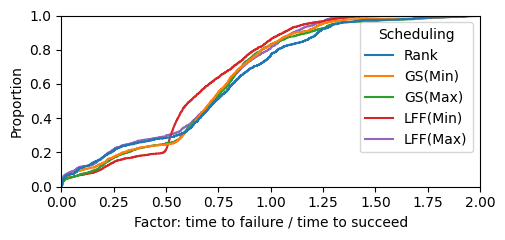

For sizing Witt-LR 23.9% fail faster than 0.5 ttf
For sizing Ponder 52.4% fail faster than 0.5 ttf


In [22]:
failedDf = pd.concat(filter( lambda x: x is not None, [ f["failed"] for f in finalResultsDataMedian]), ignore_index=True)
failedDf["sharePeakMemory"] = pd.to_numeric(failedDf["memory_adapted_failed"]) / pd.to_numeric(failedDf["peak_rss_completed"])
failedDf["shareTTF"] = pd.to_numeric(failedDf["realtime_failed"]) / pd.to_numeric(failedDf["realtime_completed"])

figsize = (4.5,2.25)
plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="sharePeakMemory", hue="Strategy_failed", hue_order=strategy_order, palette=strategyColors)
plt.xlabel("Factor: Predicted Memory / Memory to succeed")
plt.tight_layout()
plt.legend().remove()
plt.xlim(0, 2)
plt.savefig("plots/failedMemory.pdf")
plt.show()

plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="sharePeakMemory", hue="sizing_failed")
plt.xlabel("Factor: Predicted Memory / Memory to succeed")
plt.tight_layout()
plt.xlim(0, 2)
ax.get_legend().set_title("Strategy")
plt.savefig("plots/sizingFailedMemory.pdf")
plt.show()

plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="sharePeakMemory", hue="scheduling_failed")
plt.xlabel("Factor: Predicted Memory / Memory to succeed")
plt.tight_layout()
plt.xlim(0, 2)
ax.get_legend().set_title("Scheduling")
plt.savefig("plots/schedulingFailedMemory.pdf")
plt.show()

plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="shareTTF", hue="Strategy_failed", hue_order=strategy_order, palette=strategyColors)
plt.xlabel("Factor: time to failure / time to succeed")
plt.tight_layout()
plt.legend().remove()
plt.xlim(0, 2)
plt.savefig("plots/shareTTF.pdf")
plt.show()

plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="shareTTF", hue="sizing_failed")
plt.xlabel("Factor: time to failure / time to succeed")
plt.tight_layout()
ax.get_legend().set_title("Strategy")
plt.xlim(0, 2)
plt.savefig("plots/sizingShareTff.pdf")
plt.show()

plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=failedDf, x="shareTTF", hue="scheduling_failed")
plt.xlabel("Factor: time to failure / time to succeed")
plt.tight_layout()
ax.get_legend().set_title("Scheduling")
plt.xlim(0, 2)
plt.savefig("plots/schedulingShareTff.pdf")
plt.show()

for s in failedDf["sizing_failed"].unique():
    d = failedDf[failedDf["sizing_failed"] == s]
    print("For sizing", s, "{:.1f}% fail faster than 0.5 ttf".format((failedDf[failedDf["sizing_failed"] == s]["shareTTF"] < 0.5).sum() / len(d)* 100))

Distribution of wasted memory for successful tasks


C:\Users\Fabian Lehmann\AppData\Local\Temp\ipykernel_17100\2892038012.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  successfulTasks["diffPredictedAndUsed"] = (successfulTasks["memoryUsed"] - pd.to_numeric(successfulTasks["peak_rss"])) / 1024 / 1024 / 1024


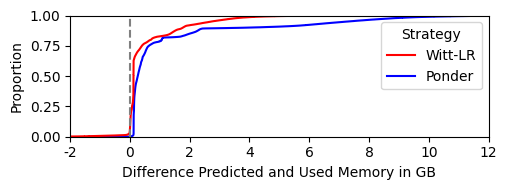

Distribution of wasted memory for all tasks


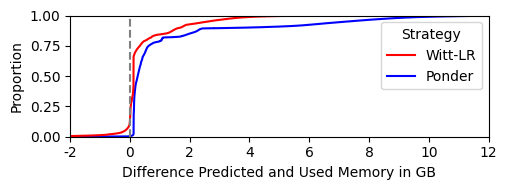

In [23]:
colorMap = {
    "Witt-LR": "red",
    "Ponder": "blue",
}
failedTasks = failedDf[["Group_completed", "memory_adapted_failed", "peak_rss_completed"]].rename(columns={"Group_completed": "Group", "memory_adapted_failed": "memory_adapted", "peak_rss_completed": "peak_rss"})
failedTasks["diffPredictedAndUsed"] = (pd.to_numeric(failedTasks["memory_adapted"]) - pd.to_numeric(failedTasks["peak_rss"])) / 1024 / 1024 / 1024
print("Distribution of wasted memory for successful tasks")
allTasks = pd.concat([f["trace"] for f in finalResultsDataMedian])
successfulTasks = allTasks[(allTasks["status"] == "COMPLETED") & (allTasks["memory_adapted"] != "-")]
successfulTasks["diffPredictedAndUsed"] = (successfulTasks["memoryUsed"] - pd.to_numeric(successfulTasks["peak_rss"])) / 1024 / 1024 / 1024
plt.figure(figsize=(5,2))
ax = sns.ecdfplot(data=successfulTasks, x="diffPredictedAndUsed", hue="Group",palette=colorMap)#, palette=strategyColors)
plt.xlabel("Difference Predicted and Used Memory in GB")
plt.vlines(0, 0, 1, color='grey', linestyle='--')
plt.tight_layout()
plt.xlim(-2, 12)
ax.get_legend().set_title("Strategy")
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)
plt.savefig("plots/diffPredictedAndUsedSucc.pdf")
plt.show()
successfulTasks = successfulTasks[['Group', 'memory_adapted', 'peak_rss', 'diffPredictedAndUsed']]
allTasks = pd.concat([successfulTasks,failedTasks])

print("Distribution of wasted memory for all tasks")
plt.figure(figsize=(5,2))
ax = sns.ecdfplot(data=allTasks, x="diffPredictedAndUsed", hue="Group",palette=colorMap)#, palette=strategyColors)
plt.xlabel("Difference Predicted and Used Memory in GB")
plt.vlines(0, 0, 1, color='grey', linestyle='--')
plt.tight_layout()
plt.xlim(-2, 12)
ax.get_legend().set_title("Strategy")
formatter = ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x))
ax.xaxis.set_major_formatter(formatter)
plt.savefig("plots/diffPredictedAndUsedAll.pdf")
plt.show()

In [24]:
failedDf["sizing_failed"]

0       Witt-LR
1       Witt-LR
2       Witt-LR
3       Witt-LR
4       Witt-LR
         ...   
8396     Ponder
8397     Ponder
8398     Ponder
8399     Ponder
8400     Ponder
Name: sizing_failed, Length: 8401, dtype: object

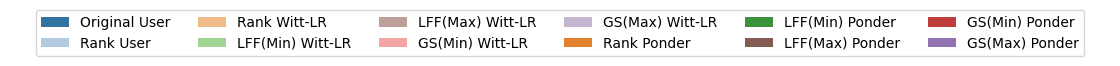

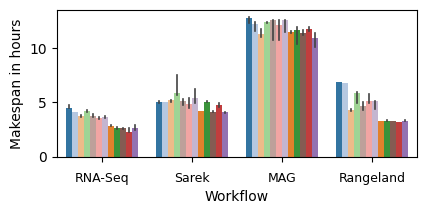

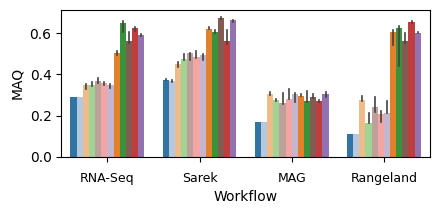

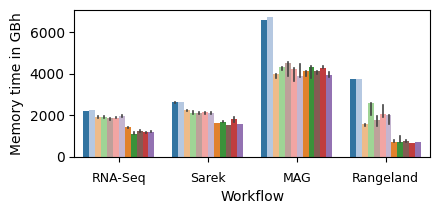

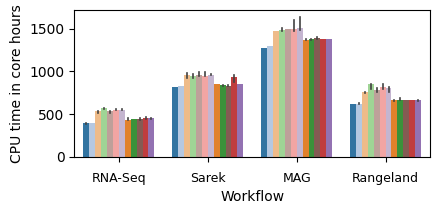

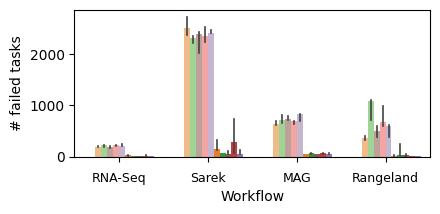

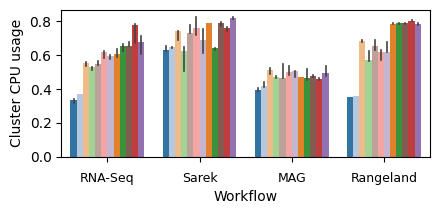

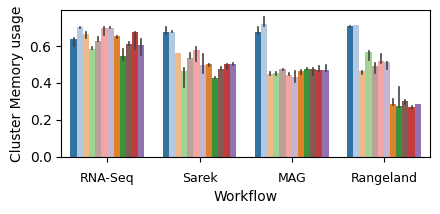

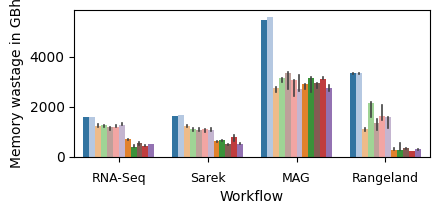

In [25]:
def plotBarchartFor( data, forWhat, yLabel, legend = False ):
    sns_plot = sns.barplot(x='Workflow', y=forWhat, hue='Strategy', data=data, hue_order=strategy_order, palette=strategyColors)

    # Extract the handles and labels
    handles, labels = sns_plot.get_legend_handles_labels()

    # Remove the legend from the original plot
    sns_plot.legend_.remove()
    plt.close()  # Close the figure to avoid displaying it
    plt.figure(figsize=(11.3,0.5))
    # Create a new figure for the legend only
    plt.figlegend(handles, labels, loc='center', ncol=len(handles)/2, title=None)
    plt.axis('off')  # Hide axes

    if legend:
        plt.tight_layout()
        # Save the legend-only plot
        plt.savefig("plots/barchartlegend.pdf")
        plt.show()
    else:
        plt.close()

    # Create and save the original plot without the legend
    plt.figure(figsize=(4.5,2.25))
    ax = sns.barplot(x='Workflow', y=forWhat, hue='Strategy', data=data, hue_order=strategy_order, palette=strategyColors, estimator=np.median, errwidth=1.2)

    current_labels = [item.get_text() for item in ax.get_xticklabels()]
    split_labels = ["\n".join(label.strip().split(" ")) for label in current_labels]
    labels = ax.set_xticklabels(split_labels, va='top')
    for i, label in enumerate(labels):
        if ( not "\n" in label.get_text() ):
            label.set_y(label.get_position()[1] - 0.035)

    plt.xlabel('Workflow')
    plt.xticks(fontsize=9)
    plt.ylabel(yLabel)
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig("plots/" + forWhat + ".pdf")
    plt.show()

plotBarchartFor(finalResults, "makespan", 'Makespan in hours', True)
plotBarchartFor(finalResults, "maq", "MAQ")
plotBarchartFor(finalResults, "memoryTime", "Memory time in GBh")
plotBarchartFor(finalResults, "cpuTime", "CPU time in core hours")
plotBarchartFor(finalResults, "failedAfterSizing", "# failed tasks")
plotBarchartFor(finalResults, "clusterUsageCPU", "Cluster CPU usage")
plotBarchartFor(finalResults, "clusterUsageMem", "Cluster Memory usage")
plotBarchartFor(finalResults, "memoryTimeWastedTotal", "Memory wastage in GBh")


In [26]:
import matplotlib.path as mpath
import matplotlib.patches as mpatches

def add_label_band_x(ax, left, right, label, *, spine_pos=-0.015, tip_pos=-0.00):
    """
    Helper function to add a bracket around x-tick labels.

    Parameters
    ----------
    ax : matplotlib.Axes
        The axes to add the bracket to.

    left, right : floats
        The positions in *data* space to bracket on the x-axis.

    label : str
        The label to add to the bracket.

    spine_pos, tip_pos : float, optional
        The position in *axes fraction* of the spine and tips of the bracket.
        These will typically be negative.

    Returns
    -------
    bracket : matplotlib.patches.PathPatch
        The "bracket" Artist. Modify this Artist to change the color etc. of
        the bracket from the defaults.

    txt : matplotlib.text.Text
        The label Artist. Modify this to change the color etc. of the label
        from the defaults.
    """
    # grab the xaxis blended transform
    transform = ax.get_xaxis_transform()

    # add the bracket
    bracket = mpatches.PathPatch(
        mpath.Path(
            [
                [left, tip_pos],
                [left, spine_pos],
                [right, spine_pos],
                [right, tip_pos],
            ]
        ),
        transform=transform,
        clip_on=False,
        facecolor="none",
        edgecolor="k",
        linewidth=0.5,
    )
    ax.add_artist(bracket)

    # add the label
    txt = ax.text(
        (left + right) / 2,
        #-0.005,
        spine_pos - 0.008,
        label,
        ha="center",
        va="top",
        rotation="horizontal",
        clip_on=False,
        transform=transform,
    )

    return bracket, txt

In [27]:
data = finalResults


import numpy as np 
import matplotlib.pyplot as plt 


plt.show() 

In [28]:
finalResults["Workflow"].unique()

array(['RNA-Seq', 'Sarek', 'MAG', 'Rangeland'], dtype=object)

['RNA-Seq', 'Sarek', 'MAG', 'Rangeland']
0.0625
12
0.7999999999999999


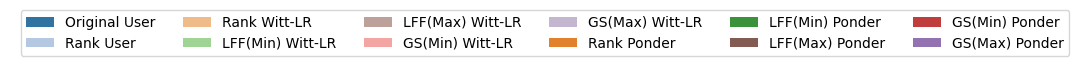

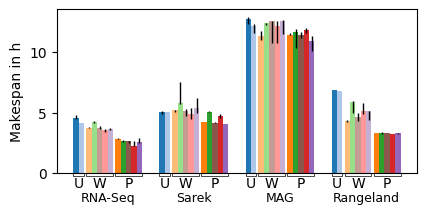

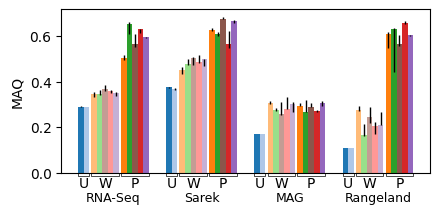

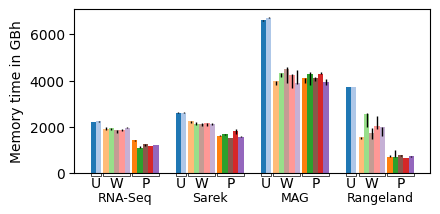

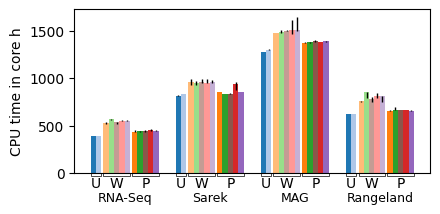

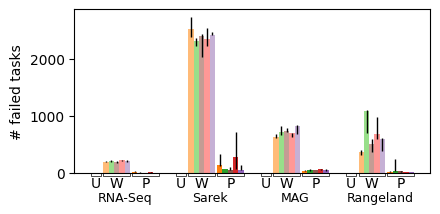

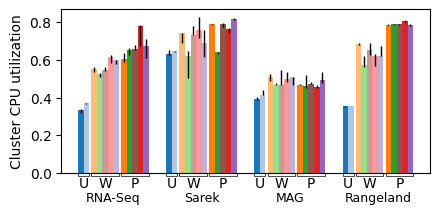

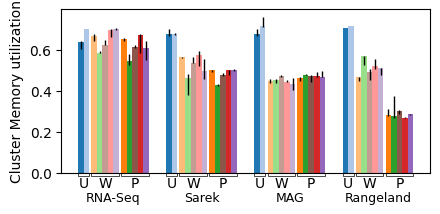

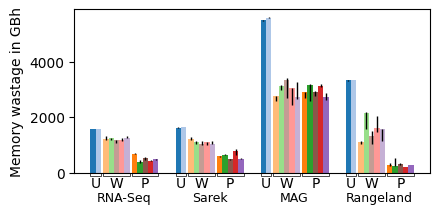

In [29]:
strategy_order = [strategyNames[x] for x in ['orig-ceph','cws-ceph', 'cwslr-ceph', 'lfflr-ceph', 'lffmaxlr-ceph', 'gslr-ceph', 'gsmlr-ceph', 'cwsponderweighted-ceph', 'lffponderweighted-ceph', 'lffmaxponderweighted-ceph', 'gsponderweighted-ceph', 'gsmponderweighted-ceph']]
workflowsUnique = ['RNA-Seq', 'Sarek','MAG', 'Rangeland']
print(workflowsUnique)
items = len(strategy_order)
classes = ['User', 'Witt-LR', 'Ponder']

gapWidth = 1.2 / 3
partForBoxes = 0.8
width = partForBoxes / (items + (len(classes) - 1) * gapWidth)
print(width)
print(items)
print((len(classes) - 1) * gapWidth)
groupCount = {}
for s in strategy_order:
    g = strategyGroupsByValues[s]
    if g not in groupCount:
        groupCount[g] = 0
    groupCount[g] += 1
groupCount


def plotBarchartFor( data, forWhat, yLabel, legend = False ):
    sns_plot = sns.barplot(x='Workflow', y=forWhat, hue='Strategy', data=data, hue_order=strategy_order, palette=strategyColors)

    # Extract the handles and labels
    handles, labels = sns_plot.get_legend_handles_labels()

    # Remove the legend from the original plot
    sns_plot.legend_.remove()
    plt.close()  # Close the figure to avoid displaying it
    plt.figure(figsize=(11,0.5))
    # Create a new figure for the legend only
    plt.figlegend(handles, labels, loc='center', ncol=len(handles)/2, title=None)
    plt.axis('off')  # Hide axes

    if legend:
        plt.tight_layout()
        # Save the legend-only plot
        plt.savefig("plots/barchartlegend.pdf")
        plt.show()
    else:
        plt.close()

    fig, ax = plt.subplots(figsize=(4.5,2.25))
    
    for i, workflow in enumerate(workflowsUnique):
        for j, strategy in enumerate(strategy_order):
            f = (data["Workflow"] == workflow) & (data["Strategy"] == strategy)
            if ( f.sum() == 0 ):
                continue
            classIndex = classes.index(strategyGroupsByValues[strategy])
            position = i + j*width + classIndex * gapWidth * width + (1 - partForBoxes)/2 + width / 2
            plt.bar(position, data[f][forWhat].median(), width, label=strategy, color = strategyColors[strategy])
            minimum = data[f][forWhat].min()
            maximum = data[f][forWhat].max()
            if ( minimum != maximum ):
                plt.vlines(position, data[f][forWhat].min(), data[f][forWhat].max(), color='black', lw=1)

    plt.xticks(np.array(range(len(workflowsUnique))) + 0.5, ["\n".join(w.split(" ")) for w in workflowsUnique]) 
    for label in ax.get_xticklabels():
        label.set_y(-0.05)
    ax.tick_params(axis='x', which='both', bottom=False, top=False)


    for i in range(len(workflowsUnique)):
        sizeBefore = 0
        for j, c in enumerate(classes):
            classIndex = classes.index(c)
            start = i + (1 - partForBoxes)/2 + sizeBefore + classIndex * gapWidth * width
            sizeBefore += groupCount[c] * width
            end = start + groupCount[c] * width
            add_label_band_x(ax, start, end, c[0])

    #plt.xlabel('Workflow')
    plt.xticks(fontsize=9)
    plt.ylabel(yLabel)
    plt.legend().remove()
    plt.tight_layout()
    plt.savefig("plots/" + forWhat + ".pdf")
    plt.show()

plotBarchartFor(finalResults, "makespan", 'Makespan in h', True)
plotBarchartFor(finalResults, "maq", "MAQ")
plotBarchartFor(finalResults, "memoryTime", "Memory time in GBh")
plotBarchartFor(finalResults, "cpuTime", "CPU time in core h")
plotBarchartFor(finalResults, "failedAfterSizing", "# failed tasks")
plotBarchartFor(finalResults, "clusterUsageCPU", "Cluster CPU utilization")
plotBarchartFor(finalResults, "clusterUsageMem", "Cluster Memory utilization")
plotBarchartFor(finalResults, "memoryTimeWastedTotal", "Memory wastage in GBh")


In [30]:
a = finalResultsMedianRun.set_index(["Workflow", "scheduling"])
witt = a[a["sizing"] == "Witt-LR"]
ponder = a[a["sizing"] == "Ponder"]
joined=witt.join(ponder, lsuffix="_witt", rsuffix="_ponder")
joined.reset_index(inplace=True)

cols = joined.columns.tolist()
ordered_cols = []

base_cols = set(col.split('_')[0] for col in cols if '_' in col)
for base in base_cols:
    ordered_cols.append(f'{base}_witt')
    ordered_cols.append(f'{base}_ponder')
    if base in ["strategy","run","Group","Strategy","sizing","workflow"]:
        continue
    print(base)
    if f'{base}_ponder' in joined.columns and f'{base}_witt' in joined.columns:
        joined[f'{base}_change'] = (joined[f'{base}_ponder'] - joined[f'{base}_witt']) / joined[f'{base}_witt']
    ordered_cols.append(f'{base}_change')

ordered_cols = ['Workflow', 'scheduling'] + ordered_cols

joined = joined[ordered_cols]
joined.to_csv("compareStrategies.csv", index=True)

failedNoSizing
clusterUsageMem
cpuTime
notFailedAfterSizing
failedAfterSizing
memoryTimeRequested
memoryTime
notFailedNoSizing
maq
memoryTimeWastedTotal
memoryTimeUsed
makespan
clusterUsageCPU
wastedSuccessful
wastedUnsuccessful


In [31]:
#Makespan analysis
print("The makespan is in ", (joined["makespan_change"]<0).sum(),"/", len(joined), " cases smaller than 0")
print("Average reduction of makespan is {:.1f}%".format(joined["makespan_change"].mean() * 100))
print("Maximal reduction of makespan is {:.1f}%".format(joined["makespan_change"].min() * 100),"for", joined[joined["makespan_change"] == joined["makespan_change"].min()][["Workflow","scheduling"]].values[0])
joined["makespan_change"].describe()

ponderBetterOrig = 0
ponderBetterCWS = 0
ponderElems = 0
wittBetterOrig = 0
wittBetterCWS = 0
wittElems = 0
#makespan better than original
for w in workflowsEval:
    origMakespan = finalResultsMedianRun[(finalResultsMedianRun["Workflow"] == workflowNames[w]) & (finalResultsMedianRun["strategy"] == "orig-ceph")]["makespan"].values[0]
    cwsMakespan = finalResultsMedianRun[(finalResultsMedianRun["Workflow"] == workflowNames[w]) & (finalResultsMedianRun["strategy"] == "cws-ceph")]["makespan"].values[0]
    wittFiltered = finalResultsMedianRun[(finalResultsMedianRun["sizing"] == "Witt-LR") & (finalResultsMedianRun["Workflow"] == workflowNames[w])]["makespan"]
    wittBetterOrig += (wittFiltered < origMakespan).sum()
    wittBetterCWS += (wittFiltered < cwsMakespan).sum()
    wittElems += len(wittFiltered)
    ponderFiltered = finalResultsMedianRun[(finalResultsMedianRun["sizing"] == "Ponder") & (finalResultsMedianRun["Workflow"] == workflowNames[w])]["makespan"]
    ponderBetterOrig += (ponderFiltered < origMakespan).sum()
    ponderBetterCWS += (ponderFiltered < cwsMakespan).sum()
    ponderElems += len(ponderFiltered)

print("Witt-LR better than Original", wittBetterOrig, "/", wittElems, "{:.1f}%".format(wittBetterOrig / wittElems * 100))
print("Witt-LR better than Rank (Max)", wittBetterCWS, "/", wittElems, "{:.1f}%".format(wittBetterCWS / wittElems * 100))
print("Ponder better than Original", ponderBetterOrig, "/", ponderElems, "{:.1f}%".format(ponderBetterOrig / ponderElems * 100))
print("Ponder better than Rank (Max)", ponderBetterCWS, "/", ponderElems, ponderElems, "{:.1f}%".format(ponderBetterCWS / ponderElems * 100))

The makespan is in  19 / 20  cases smaller than 0
Average reduction of makespan is -21.8%
Maximal reduction of makespan is -43.5% for ['Rangeland' 'LFF(Min)']
Witt-LR better than Original 16 / 20 80.0%
Witt-LR better than Rank (Max) 12 / 20 60.0%
Ponder better than Original 19 / 20 95.0%
Ponder better than Rank (Max) 19 / 20 20 95.0%


In [32]:
print("Makespan of Witt-LR better than Ponder by")
print(joined[joined["makespan_change"]>0]["makespan_change"]
)
joined[joined["makespan_change"]>0]

Makespan of Witt-LR better than Ponder by
10    0.009896
Name: makespan_change, dtype: float64


Workflow scheduling  failedNoSizing_witt  failedNoSizing_ponder  \
10      MAG       Rank                    0                      0   

    failedNoSizing_change  clusterUsageMem_witt  clusterUsageMem_ponder  \
10                    NaN              0.456659                0.467878   

    clusterUsageMem_change run_witt run_ponder  ... makespan_change  \
10                0.024567        2          1  ...        0.009896   

   clusterUsageCPU_witt  clusterUsageCPU_ponder  clusterUsageCPU_change  \
10             0.510005                0.469429               -0.079559   

    wastedSuccessful_witt wastedSuccessful_ponder wastedSuccessful_change  \
10            2677.647663             2886.552314                0.078018   

    wastedUnsuccessful_witt  wastedUnsuccessful_ponder  \
10                96.129529                  13.343221   

    wastedUnsuccessful_change  
10                  -0.861195  

[1 rows x 59 columns]

In [33]:
print("Makespan average standard deviation in minutes")
finalResultsMedianRun[["Workflow", "sizing", "makespan"]].groupby(["Workflow", "sizing"]).std().reset_index()[["sizing", "makespan"]].groupby(["sizing"]).mean()*60

Makespan average standard deviation in minutes


makespan
sizing            
Ponder   15.282740
User     10.744175
Witt-LR  25.733773

In [34]:
# failed tasks for rangeland preprocessing if it is still the worst workflow:
lffTraceWitt = None
lffTracePonder = None
for d in finalResultsDataMedian:
    if d["data"]["Workflow"] == "Rangeland" and d["data"]["Strategy"] == "LFF(Min) Witt-LR":
        lffTraceWitt = d["trace"]
    if d["data"]["Workflow"] == "Rangeland" and d["data"]["Strategy"] == "LFF(Min) Ponder":
        lffTracePonder = d["trace"]
preprocesses = lffTraceWitt[lffTraceWitt["process"]=="NFCORE_RANGELAND:RANGELAND:PREPROCESSING:FORCE_PREPROCESS"]
fails = (preprocesses["status"] == "FAILED").sum()
print("LFF(Min) Witt-LR failed for: {} tasks == {:.1f}%".format(fails, fails / len(preprocesses) * 100))

preprocesses = lffTracePonder[lffTracePonder["process"]=="NFCORE_RANGELAND:RANGELAND:PREPROCESSING:FORCE_PREPROCESS"]
fails = (preprocesses["status"] == "FAILED").sum()
print("LFF(Min) Ponder failed for: {} tasks == {:.1f}%".format(fails, fails / len(preprocesses) * 100))

LFF(Min) Witt-LR failed for: 991 tasks == 32.4%
LFF(Min) Ponder failed for: 25 tasks == 1.2%


In [35]:
#Failure rate
joined["failedAfterSizing_change"].describe()
print("Witt-LR has on average {:.1f}% more failed tasks".format(joined["failedAfterSizing_change"].mean() * 100) )

Witt-LR has on average -93.8% more failed tasks


In [36]:
print("The MAQ is in ", (joined["maq_change"]>0).sum(),"/", len(joined), " cases larger than 0")
print("Average increase of MAQ is {:.1f}%".format(joined["maq_change"].mean() * 100))
print("Worst decrease of MAQ is {:.1f}%".format(joined["maq_change"].min() * 100), "for", joined[joined["maq_change"] == joined["maq_change"].min()][["Workflow","scheduling"]].values[0])
print("Highest increase of MAQ is {:.1f}%".format(joined["maq_change"].max() * 100), "for", joined[joined["maq_change"] == joined["maq_change"].max()][["Workflow","scheduling"]].values[0])
joined["maq_change"].describe()
joined["maq_change"]

The MAQ is in  17 / 20  cases larger than 0
Average increase of MAQ is 71.0%
Worst decrease of MAQ is -4.8% for ['MAG' 'LFF(Min)']
Highest increase of MAQ is 286.3% for ['Rangeland' 'LFF(Min)']


0     0.426363
1     0.803078
2     0.681978
3     0.756846
4     0.505180
5     0.407796
6     0.162357
7     0.312319
8     0.214492
9     0.342192
10   -0.032066
11   -0.021730
12    0.157408
13   -0.047696
14    0.124526
15    1.190269
16    2.201326
17    1.848348
18    2.862900
19    1.307947
Name: maq_change, dtype: float64

In [37]:
print("The Memorytime is in ", (joined["memoryTime_change"]<0).sum(),"/", len(joined), " cases smaller than 0")
print("Mean reduction of memorytime: {:.1f}%".format(joined["memoryTime_change"].mean() * 100))
print("The CPU time is in ", (joined["cpuTime_change"]<0).sum(),"/", len(joined), " cases smaller than 0")
print("Mean reduction of CPU time: {:.1f}%".format(joined["cpuTime_change"].mean() * 100))

The Memorytime is in  17 / 20  cases smaller than 0
Mean reduction of memorytime: -30.7%
The CPU time is in  20 / 20  cases smaller than 0
Mean reduction of CPU time: -13.3%


In [38]:
print("CPU usage in cluster is {:.1f}% higher for Ponder".format(joined["clusterUsageCPU_change"].mean() * 100))
print("Ponder uses {:.1f}% of the cluster on average".format(joined["clusterUsageMem_ponder"].mean() * 100))

CPU usage in cluster is 12.7% higher for Ponder
Ponder uses 46.7% of the cluster on average


Diff between all predictions


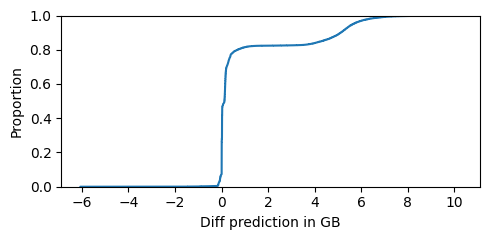

Diff between all predictions


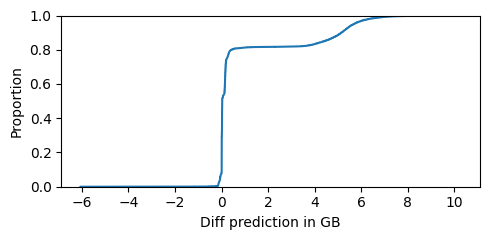

Diff between all predictions for completed


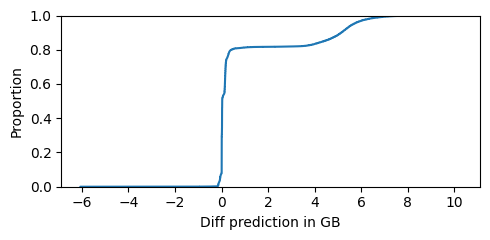

Diff between all predictions for failed


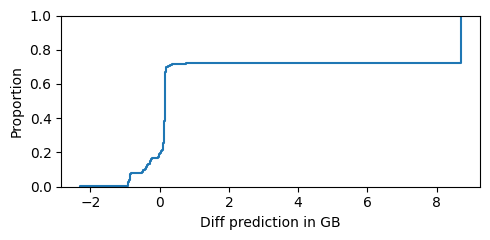

For 7.3%, Ponder predicted a value smaller than Witt-LR
When Ponder predicts less than Witt: Failed tasks for ponder 3.7%, failed tasks for witt 1.1%


In [39]:
workflowsUnique = list(finalResults["Workflow"].unique())
schedulingUnique = list(finalResults["scheduling"].unique())
schedulingUnique.remove("Original")

resultsTasks = []

for workflow in workflowsUnique:
    for scheduling in schedulingUnique:
        witt = None
        ponder = None
        for d in finalResultsDataMedian:
            if d["data"]['Workflow'] == workflow and d["data"]['scheduling'] == scheduling:
                if d["data"]['sizing'] == 'Witt-LR' :
                    witt = d["trace"]
                elif d["data"]['sizing'] == 'Ponder':
                    ponder = d["trace"]
        if ( witt is None ):
            print("Witt-LR not found for", workflow, scheduling)
            continue
        if ( ponder is None ):
            print("Ponder not found for", workflow, scheduling)
            continue
        c = ["name", "input_size"]

        witt = witt[witt["memory_adapted"] != "-"]
        duplicates = witt[c].duplicated(keep=False)
        witt = witt[~duplicates]
        witt = witt.set_index(c)

        ponder = ponder[ponder["memory_adapted"] != "-"]
        duplicates = ponder[c].duplicated(keep=False)
        ponder = ponder[~duplicates]
        ponder = ponder.set_index(c)

        
        joined = witt.join(ponder, lsuffix="_witt", rsuffix="_ponder")
        joined = joined[joined["strategy_ponder"].notna()]
        joined["memory_adapted_ponderGB"] = pd.to_numeric(joined["memory_adapted_ponder"]) / 1024 / 1024 / 1024
        joined["memory_adapted_wittGB"] = pd.to_numeric(joined["memory_adapted_witt"]) / 1024 / 1024 / 1024
        joined["memory_ponderGB"] = pd.to_numeric(joined["memory_ponder"]) / 1024 / 1024 / 1024
        joined["memory_wittGB"] = pd.to_numeric(joined["memory_witt"]) / 1024 / 1024 / 1024
        joined["memory_adapted_diff"] = (joined["memory_adapted_ponderGB"] - joined["memory_adapted_wittGB"])
        resultsTasks.append(joined)
mergedTasks = pd.concat(resultsTasks, ignore_index=True)

print("Diff between all predictions")
plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=mergedTasks, x="memory_adapted_diff")
plt.xlabel("Diff prediction in GB")
plt.tight_layout()
plt.savefig("plots/diffMemoryPrediction.pdf")
plt.show()

print("Diff between all predictions")
plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=mergedTasks[mergedTasks["status_ponder"] == mergedTasks["status_witt"]], x="memory_adapted_diff")
plt.xlabel("Diff prediction in GB")
plt.tight_layout()
plt.savefig("plots/diffMemoryPredictionSameResult.pdf")
plt.show()

print("Diff between all predictions for completed")
plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=mergedTasks[(mergedTasks["status_ponder"] == "COMPLETED") &  (mergedTasks["status_witt"] == "COMPLETED")], x="memory_adapted_diff")
plt.xlabel("Diff prediction in GB")
plt.tight_layout()
plt.savefig("plots/diffMemoryPredictionSameResult.pdf")
plt.show()

print("Diff between all predictions for failed")
plt.figure(figsize=(5,2.5))
ax = sns.ecdfplot(data=mergedTasks[(mergedTasks["status_ponder"] == "FAILED") &  (mergedTasks["status_witt"] == "FAILED")], x="memory_adapted_diff")
plt.xlabel("Diff prediction in GB")
plt.tight_layout()
plt.savefig("plots/diffMemoryPredictionSameResult.pdf")
plt.show()


aaDiff = mergedTasks.sort_values("memory_adapted_diff", ascending=False)
aaDiff[["memory_adapted_diff", "memory_adapted_ponderGB", "memory_adapted_wittGB", "status_ponder", "status_witt"]]
tasksWithLessMemory = aaDiff[aaDiff["memory_adapted_diff"] < 0]
print("For {:.1f}%, Ponder predicted a value smaller than Witt-LR".format((len(tasksWithLessMemory)/len(aaDiff) * 100)))
print("When Ponder predicts less than Witt: Failed tasks for ponder {:.1f}%, failed tasks for witt {:.1f}%".format(((tasksWithLessMemory["status_ponder"] == "FAILED").sum()/len(tasksWithLessMemory)) * 100, ((tasksWithLessMemory["status_witt"] == "FAILED").sum()/len(tasksWithLessMemory)) * 100))


In [40]:
finalResultsMedianRun[["Workflow","scheduling","sizing","makespan"]]

Workflow scheduling   sizing   makespan
0     RNA-Seq       Rank     User   4.150404
1     RNA-Seq       Rank  Witt-LR   3.754592
2     RNA-Seq       Rank   Ponder   2.812667
3     RNA-Seq    GS(Min)  Witt-LR   3.571944
4     RNA-Seq    GS(Max)  Witt-LR   3.608694
5     RNA-Seq    GS(Max)   Ponder   2.589960
6     RNA-Seq    GS(Min)   Ponder   2.240322
7     RNA-Seq   LFF(Min)  Witt-LR   4.228124
8     RNA-Seq   LFF(Max)  Witt-LR   3.707860
9     RNA-Seq   LFF(Max)   Ponder   2.660167
10    RNA-Seq   LFF(Min)   Ponder   2.616274
11    RNA-Seq   Original     User   4.514475
12      Sarek       Rank     User   5.041720
13      Sarek       Rank  Witt-LR   5.187816
14      Sarek       Rank   Ponder   4.225754
15      Sarek    GS(Min)  Witt-LR   4.861345
16      Sarek    GS(Max)  Witt-LR   5.393924
17      Sarek    GS(Max)   Ponder   4.064208
18      Sarek    GS(Min)   Ponder   4.750751
19      Sarek   LFF(Min)  Witt-LR   5.821219
20      Sarek   LFF(Max)  Witt-LR   5.111031
21      Sarek   LFF(Max)   Ponder   4.121665
22      Sarek   LFF(Min)   Ponder   5.067621
23      Sarek   Original     User   5.039714
24        MAG       Rank     User  12.181912
25        MAG       Rank  Witt-LR  11.326156
26        MAG       Rank   Ponder  11.438241
27        MAG    GS(Min)  Witt-LR  12.113810
28        MAG    GS(Max)  Witt-LR  12.584632
29        MAG    GS(Max)   Ponder  10.911778
30        MAG    GS(Min)   Ponder  11.781583
31        MAG   LFF(Min)  Witt-LR  12.357432
32        MAG   LFF(Max)  Witt-LR  12.573197
33        MAG   LFF(Max)   Ponder  11.402166
34        MAG   LFF(Min)   Ponder  11.621968
35        MAG   Original     User  12.749716
36  Rangeland       Rank     User   6.809213
37  Rangeland       Rank  Witt-LR   4.326676
38  Rangeland       Rank   Ponder   3.272449
39  Rangeland    GS(Min)  Witt-LR   5.140656
40  Rangeland    GS(Max)  Witt-LR   5.101816
41  Rangeland    GS(Max)   Ponder   3.286615
42  Rangeland    GS(Min)   Ponder   3.205531
43  Rangeland   LFF(Min)  Witt-LR   5.840973
44  Rangeland   LFF(Max)  Witt-LR   4.659914
45  Rangeland   LFF(Max)   Ponder   3.299410
46  Rangeland   LFF(Min)   Ponder   3.300111
47  Rangeland   Original     User   6.888302

In [41]:
def rateSchedulingStrategyForSizing( data, sizing, sortby,ascending, normalize):
    data = data[data["sizing"] == sizing]
    scheds = data["scheduling"].unique()
    workf = data["Workflow"].unique()

    points = { k:0 for k in scheds }
    observed = { k:0 for k in scheds }

    for w in workf:
        dataT = data[data["Workflow"] == w].copy(deep=True)
        if normalize:
            minValue = dataT[sortby].min()
            dataT[sortby] = dataT[sortby] / minValue
        for s in scheds:
            f = dataT[dataT["scheduling"] == s]
            if ( len(f) != 1 ):
                print("WARNING", w, s)
                continue
            observed[s] += 1
            points[s] += f[sortby].sum()
    for s in scheds:
        points[s] = points[s] / observed[s]
    sorted_points = sorted(points.items(), key=lambda item: item[1], reverse=not ascending)
    print(f"Points for {sizing}")
    for name, points in sorted_points:
        print(f"{name}: {points}")

def rateSchedulingStrategy( data, sortby, ascending, normalize = False):
    print(sortby)
    rateSchedulingStrategyForSizing(data, "Ponder", sortby, ascending, normalize)
    print("-"*15)
    rateSchedulingStrategyForSizing(data, "Witt-LR", sortby, ascending, normalize)


rateSchedulingStrategy(finalResultsMedianRun, "makespan", True, normalize = True)
print("-"*15)
print("-"*15)
rateSchedulingStrategy(finalResultsMedianRun, "maq", False)


makespan
Points for Ponder
GS(Max): 1.0453402085768846
GS(Min): 1.0621591428270665
LFF(Max): 1.0689422795640502
Rank: 1.0910864081697378
LFF(Min): 1.1273228976494918
---------------
Points for Witt-LR
Rank: 1.0295726544637822
GS(Min): 1.0644184226292372
LFF(Max): 1.0691336939590461
GS(Max): 1.1025271217548926
LFF(Min): 1.2055494855102327
---------------
---------------
maq
Points for Ponder
GS(Max): 0.5386233739526339
GS(Min): 0.5313064322234727
LFF(Min): 0.5297673793942559
LFF(Max): 0.5188889296874035
Rank: 0.5091808821843671
---------------
Points for Witt-LR
Rank: 0.34584498572727596
LFF(Max): 0.3420591766493195
GS(Max): 0.33159560185798553
GS(Min): 0.32948551485901884
LFF(Min): 0.32305213050028275


In [42]:
finalResultsMedianRun[finalResultsMedianRun["scheduling"] == "LFF(Min)"]

workflow                strategy   Workflow          Strategy    Group  \
7      rnaseq              lfflr-ceph    RNA-Seq  LFF(Min) Witt-LR  Witt-LR   
10     rnaseq  lffponderweighted-ceph    RNA-Seq   LFF(Min) Ponder   Ponder   
19      sarek              lfflr-ceph      Sarek  LFF(Min) Witt-LR  Witt-LR   
22      sarek  lffponderweighted-ceph      Sarek   LFF(Min) Ponder   Ponder   
31        mag              lfflr-ceph        MAG  LFF(Min) Witt-LR  Witt-LR   
34        mag  lffponderweighted-ceph        MAG   LFF(Min) Ponder   Ponder   
43  rangeland              lfflr-ceph  Rangeland  LFF(Min) Witt-LR  Witt-LR   
46  rangeland  lffponderweighted-ceph  Rangeland   LFF(Min) Ponder   Ponder   

   run scheduling   sizing  wastedSuccessful  wastedUnsuccessful  ...  \
7    3   LFF(Min)  Witt-LR       1006.893727          255.050623  ...   
10   1   LFF(Min)   Ponder        445.510921           11.354071  ...   
19   2   LFF(Min)  Witt-LR       1052.745211           70.811069  ...   
22   3   LFF(Min)   Ponder        729.210040           17.949593  ...   
31   3   LFF(Min)  Witt-LR       2877.208059          129.866801  ...   
34   2   LFF(Min)   Ponder       3065.402699           81.554668  ...   
43   1   LFF(Min)  Witt-LR       2000.079504          141.037443  ...   
46   1   LFF(Min)   Ponder        247.173418            1.449841  ...   

    notFailedNoSizing  memoryTimeRequested  memoryTimeUsed  \
7                 561          1931.172038      669.272470   
10                428          1168.027101      711.162108   
19               2673          2073.727293     1034.251240   
22                478          1680.701504     1018.027591   
31               1010          4175.764187     1179.096054   
34                474          4304.406252     1157.449430   
43               1312          2562.753438      421.672661   
46                280           682.265016      433.645839   

    memoryTimeWastedTotal       maq   makespan      cpuTime   memoryTime  \
7             1261.899568  0.346563   4.228124   571.102347  1931.172038   
10             456.864993  0.608858   2.616274   438.556789  1168.027101   
19            1039.476053  0.498740   5.821219   928.828986  2073.727293   
22             662.673914  0.605716   5.067621   835.680611  1680.701504   
31            2996.668133  0.282367  12.357432  1482.425909  4175.764187   
34            3146.956821  0.268899  11.621968  1378.593640  4304.406252   
43            2141.080777  0.164539   5.840973   856.031462  2562.753438   
46             248.619177  0.635597   3.300111   663.471212   682.265016   

    clusterUsageCPU  clusterUsageMem  
7          0.527626         0.594719  
10         0.654791         0.581311  
19         0.623278         0.463849  
22         0.644164         0.431842  
31         0.468603         0.439994  
34         0.463358         0.482250  
43         0.572486         0.571295  
46         0.785333         0.269193  

[8 rows x 23 columns]

In [43]:
print("LFF(Min) better than LFF(Max) for")
a = finalResultsMedianRun[finalResultsMedianRun["scheduling"] == "LFF(Min)"]
b = finalResultsMedianRun[finalResultsMedianRun["scheduling"] == "LFF(Max)"]
a = a.set_index(["Workflow", "sizing"])
b = b.set_index(["Workflow", "sizing"])
j = a.join(b, lsuffix="_min", rsuffix="_max")
j = j[j["makespan_min"] < j["makespan_max"]][["makespan_min", "makespan_max"]]
j["diff_in_min"] = (j["makespan_max"] - j["makespan_min"]) * 60
j

LFF(Min) better than LFF(Max) for


makespan_min  makespan_max  diff_in_min
Workflow sizing                                          
RNA-Seq  Ponder       2.616274      2.660167     2.633583
MAG      Witt-LR     12.357432     12.573197    12.945933

In [44]:
#    "failedAfterSizing": failedAfterSizing,
#        "notFailedAfterSizing": notFailedAfterSizing,
#        "failedNoSizing": failedNoSizing,
#        "notFailedNoSizing": notFailedNoSizing,
a = finalResultsMedianRun[["Workflow","scheduling", "sizing","failedAfterSizing","notFailedAfterSizing","failedNoSizing","notFailedNoSizing"]].copy(deep=True)
a["numberTasks"] = a["notFailedAfterSizing"] + a["notFailedNoSizing"]
a["sized"] = a["failedAfterSizing"] + a["notFailedAfterSizing"]
a["triedToSize"] = a["sized"] / a["numberTasks"] * 100
a["successfulSizedRelationToSized"] = a["notFailedAfterSizing"] / a["sized"] * 100
a["successfulSizedRelationToAll"] = a["notFailedAfterSizing"] / a["numberTasks"] * 100
b = a.groupby(["scheduling", "sizing"]).mean(numeric_only=True).sort_values("triedToSize", ascending=False)

print("Difference between workflows how many tasks were successfully sized to size")
successfullSizedRelationToSizedMin = b.groupby(["sizing"]).min()["successfulSizedRelationToSized"]
successfullSizedRelationToSizedMax = b.groupby(["sizing"]).max()["successfulSizedRelationToSized"]
# diff in percent
for s in successfullSizedRelationToSizedMin.index:
    print(f"{s}: {successfullSizedRelationToSizedMax[s] - successfullSizedRelationToSizedMin[s]:.1f}%")

print("Difference between workflows how many tasks were tried to size")
triedToSizeMin = b.groupby(["sizing"]).min()["triedToSize"]
triedToSizeMax = b.groupby(["sizing"]).max()["triedToSize"]
# diff in percent
for s in triedToSizeMin.index:
    print(f"{s}: {triedToSizeMax[s] - triedToSizeMin[s]:.1f}%")

triedToSizeMin

Difference between workflows how many tasks were successfully sized to size
Ponder: 1.3%
User: nan%
Witt-LR: 5.1%
Difference between workflows how many tasks were tried to size
Ponder: 1.8%
User: 0.0%
Witt-LR: 3.1%


sizing
Ponder     87.762083
User        0.000000
Witt-LR    88.805641
Name: triedToSize, dtype: float64

In [45]:
b

failedAfterSizing  notFailedAfterSizing  failedNoSizing  \
scheduling sizing                                                             
GS(Max)    Witt-LR            1025.25               3863.75            0.00   
GS(Min)    Witt-LR            1028.25               3858.75            0.00   
Rank       Witt-LR             887.75               3956.00            0.00   
LFF(Min)   Witt-LR            1059.75               3795.75            0.00   
GS(Min)    Ponder               92.25               4739.50            0.00   
GS(Max)    Ponder               31.50               4776.75            0.00   
LFF(Max)   Witt-LR             879.25               3962.75            0.00   
Rank       Ponder              104.50               4680.75            0.00   
LFF(Max)   Ponder               50.00               4751.25            0.00   
LFF(Min)   Ponder               46.50               4769.75            0.00   
Original   User                  0.00                  0.00            0.25   
Rank       User                  0.00                  0.00            0.50   

                    notFailedNoSizing  numberTasks    sized  triedToSize  \
scheduling sizing                                                          
GS(Max)    Witt-LR            1319.50      5183.25  4889.00    91.872097   
GS(Min)    Witt-LR            1326.75      5185.50  4887.00    91.428126   
Rank       Witt-LR            1228.00      5184.00  4843.75    90.292378   
LFF(Min)   Witt-LR            1389.00      5184.75  4855.50    89.586914   
GS(Min)    Ponder              444.50      5184.00  4831.75    89.518951   
GS(Max)    Ponder              408.00      5184.75  4808.25    88.905251   
LFF(Max)   Witt-LR            1221.25      5184.00  4842.00    88.805641   
Rank       Ponder              502.50      5183.25  4785.25    88.739655   
LFF(Max)   Ponder              432.00      5183.25  4801.25    88.272401   
LFF(Min)   Ponder              415.00      5184.75  4816.25    87.762083   
Original   User               5184.00      5184.00     0.00     0.000000   
Rank       User               5184.00      5184.00     0.00     0.000000   

                    successfulSizedRelationToSized  \
scheduling sizing                                    
GS(Max)    Witt-LR                       79.191127   
GS(Min)    Witt-LR                       79.442601   
Rank       Witt-LR                       82.177606   
LFF(Min)   Witt-LR                       77.115359   
GS(Min)    Ponder                        98.360594   
GS(Max)    Ponder                        99.330378   
LFF(Max)   Witt-LR                       81.423186   
Rank       Ponder                        98.002552   
LFF(Max)   Ponder                        98.957656   
LFF(Min)   Ponder                        98.887081   
Original   User                                NaN   
Rank       User                                NaN   

                    successfulSizedRelationToAll  
scheduling sizing                                 
GS(Max)    Witt-LR                     72.857065  
GS(Min)    Witt-LR                     72.715050  
Rank       Witt-LR                     74.383840  
LFF(Min)   Witt-LR                     69.221135  
GS(Min)    Ponder                      88.039804  
GS(Max)    Ponder                      88.319944  
LFF(Max)   Witt-LR                     72.559721  
Rank       Ponder                      86.976829  
LFF(Max)   Ponder                      87.355191  
LFF(Min)   Ponder                      86.821015  
Original   User                         0.000000  
Rank       User                         0.000000

In [46]:
finalResults.to_csv("finalResults.csv", index=False)